# Indus Valley Script- Text Analysis for Decipherment

# Helpers and Tests

Dataset was created as a csv file from ICIT web site from raw html files of ICIT code for each for the Text
Data labels were changes and a linearized copy of the original text was added

### Input:
Pickled data file from Language Models

### Output:
Test results


!pip install numpy
!pip install pandas
!python3 -m pip install matplotlib
!pip3 install scikit-learn
!pip3 install nltk
!pip3 install ipywidgets
!pip3 install -U dill
!pip3 install requests
!pip3 install -U spacy
!pip3 install numpy

In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import collections
import random
import traceback
import pickle
import copy
nltk.download('punkt')

plt.style.use(style='seaborn')
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/venkatsubramanian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten
from collections import defaultdict
from nltk.lm.preprocessing import pad_both_ends
from nltk.util import everygrams
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.lm.models import MLE
from nltk.lm.models import KneserNeyInterpolated
from nltk.lm.models import Lidstone
from collections import Counter

In [3]:
random_seed = 8
seed = 8

# Sign Position
CONST_INITIAL = "Initial"
CONST_TERMINAL = "Terminal"
CONST_MEDIAL = "Medial"

CONST_ALL= "All"
CONST_NL = 10

# Algorithm
CONST_ALGO_SIGN_FILL_IN_FULL = "ALGO_SIGN_FILL_IN_FULL"
CONST_ALGO_SIGN_FILL_IN_START = "ALGO_SIGN_FILL_IN_START"
CONST_ALGO_MIXED = "ALGO_MIXED"

In [4]:
"""" Unpickle some of the dataframes needed """
df_train_x = pd.read_pickle('pickle/train_x.pkl')
df_train_y = pd.read_pickle('pickle/train_y.pkl')

df_train_x_rev = pd.read_pickle('pickle/train_x_rev.pkl')
df_train_y_rev = pd.read_pickle('pickle/train_y_rev.pkl')

df_test_x = pd.read_pickle('pickle/test_x.pkl')
df_test_y= pd.read_pickle('pickle/test_y.pkl')

print("Train size:", len(df_train_x))
print("Test size:", len(df_test_x))

df_test_x_rev = pd.read_pickle('pickle/test_x_rev.pkl')
df_test_y_rev = pd.read_pickle('pickle/test_y_rev.pkl')

orig_sign_df = pd.read_pickle('pickle/orig_sign_df.pkl')
print("Original sign df: \n", orig_sign_df)

df_unclear = pd.read_pickle('pickle/unclear_df.pkl')
print("Unclear text df: \n", df_unclear)

Train size: 1778
Test size: 445
Original sign df: 
     id_sign sign_class set   graph       type        image variants  \
0         1        SIM  01  stroke     stroke  sign001.jpg        1   
1         2        MKR  01  stroke     stroke  sign002.jpg        1   
2         3        SIM  01  stroke     stroke  sign003.jpg        1   
3         4        SIM  01  stroke     stroke  sign004.jpg        1   
4         5        SIM  01  stroke     stroke  sign005.jpg        1   
..      ...        ...  ..     ...        ...          ...      ...   
704     952        CMX  71  animal  uncertain  sign952.jpg        1   
705     953        CMX  71  animal       Pict  sign953.jpg        1   
706     956        SIM  71       -    att.d.e  sign956.jpg        1   
707     957        CMX  71       -  uncertain  sign957.jpg        1   
708     958        CMX  71       -  uncertain  sign958.jpg        1   

          function ligatur value frequency comment  
0    NUM, ITM, SHN       -     -       227

In [5]:
model_name_list = ["MLE","KneserNeyInterpolated", "Laplace", "Lidstone","StupidBackoff", "WittenBellInterpolated"]


"""Unpickle all the trained Language Models"""
def unpickle_models(order, model_type,data_type):
    try:
        model_list= []
        for index in range (0,len(model_name_list)):
            file_name = "pickle/" + model_name_list[index]+ "_" + model_type + "_" + data_type + "_" + str(order) +".pkl"
            print("Unpickling Model from ", file_name)
            with open(file_name , 'rb') as f:
                model_list.append(pickle.load(f))
    except Exception as e:
        print("Exception:", e.__class__, "unpickle_models")
        traceback.print_exc()
    return model_list

order=1
models_list_fwd_unigram_all = unpickle_models(order,"fwd","all")
models_list_rev_unigram_all = unpickle_models(order,"rev", "all")

order=2
models_list_fwd_bigram_all = unpickle_models(order,"fwd","all")
models_list_rev_bigram_all = unpickle_models(order,"rev","all")

order=3
models_list_fwd_trigram_all = unpickle_models(order,"fwd","all")
models_list_rev_trigram_all = unpickle_models(order,"rev","all")

order=4
models_list_fwd_quadrigram_all = unpickle_models(order,"fwd","all")
models_list_rev_quadrigram_all = unpickle_models(order,"rev","all")

order=5
models_list_fwd_pentagram_all = unpickle_models(order,"fwd","all")
models_list_rev_pentagram_all = unpickle_models(order,"rev","all")

order=6
models_list_fwd_hexagram_all = unpickle_models(order,"fwd","all")
models_list_rev_hexagram_all = unpickle_models(order,"rev","all")

order=7
models_list_fwd_septagram_all = unpickle_models(order,"fwd","all")
models_list_rev_septagram_all = unpickle_models(order,"rev","all")

order=1
models_list_fwd_unigram = unpickle_models(order,"fwd","train")
models_list_rev_unigram = unpickle_models(order,"rev", "train")

order=2
models_list_fwd_bigram = unpickle_models(order,"fwd","train")
models_list_rev_bigram = unpickle_models(order,"rev","train")

order=3
models_list_fwd_trigram = unpickle_models(order,"fwd","train")
models_list_rev_trigram = unpickle_models(order,"rev","train")

order=4
models_list_fwd_quadrigram = unpickle_models(order,"fwd","train")
models_list_rev_quadrigram = unpickle_models(order,"rev","train")

order=5
models_list_fwd_pentagram = unpickle_models(order,"fwd","train")
models_list_rev_pentagram = unpickle_models(order,"rev","train")

order=6
models_list_fwd_hexagram = unpickle_models(order,"fwd","train")
models_list_rev_hexagram = unpickle_models(order,"rev","train")

order=7
models_list_fwd_septagram = copy.deepcopy(unpickle_models(order,"fwd","train"))
models_list_rev_septagram = copy.deepcopy(unpickle_models(order,"rev","train"))


Unpickling Model from  pickle/MLE_fwd_all_1.pkl
Unpickling Model from  pickle/KneserNeyInterpolated_fwd_all_1.pkl
Unpickling Model from  pickle/Laplace_fwd_all_1.pkl
Unpickling Model from  pickle/Lidstone_fwd_all_1.pkl
Unpickling Model from  pickle/StupidBackoff_fwd_all_1.pkl
Unpickling Model from  pickle/WittenBellInterpolated_fwd_all_1.pkl
Unpickling Model from  pickle/MLE_rev_all_1.pkl
Unpickling Model from  pickle/KneserNeyInterpolated_rev_all_1.pkl
Unpickling Model from  pickle/Laplace_rev_all_1.pkl
Unpickling Model from  pickle/Lidstone_rev_all_1.pkl
Unpickling Model from  pickle/StupidBackoff_rev_all_1.pkl
Unpickling Model from  pickle/WittenBellInterpolated_rev_all_1.pkl
Unpickling Model from  pickle/MLE_fwd_all_2.pkl
Unpickling Model from  pickle/KneserNeyInterpolated_fwd_all_2.pkl
Unpickling Model from  pickle/Laplace_fwd_all_2.pkl
Unpickling Model from  pickle/Lidstone_fwd_all_2.pkl
Unpickling Model from  pickle/StupidBackoff_fwd_all_2.pkl
Unpickling Model from  pickle/Witte

Unpickling Model from  pickle/Lidstone_fwd_train_6.pkl
Unpickling Model from  pickle/StupidBackoff_fwd_train_6.pkl
Unpickling Model from  pickle/WittenBellInterpolated_fwd_train_6.pkl
Unpickling Model from  pickle/MLE_rev_train_6.pkl
Unpickling Model from  pickle/KneserNeyInterpolated_rev_train_6.pkl
Unpickling Model from  pickle/Laplace_rev_train_6.pkl
Unpickling Model from  pickle/Lidstone_rev_train_6.pkl
Unpickling Model from  pickle/StupidBackoff_rev_train_6.pkl
Unpickling Model from  pickle/WittenBellInterpolated_rev_train_6.pkl
Unpickling Model from  pickle/MLE_fwd_train_7.pkl
Unpickling Model from  pickle/KneserNeyInterpolated_fwd_train_7.pkl
Unpickling Model from  pickle/Laplace_fwd_train_7.pkl
Unpickling Model from  pickle/Lidstone_fwd_train_7.pkl
Unpickling Model from  pickle/StupidBackoff_fwd_train_7.pkl
Unpickling Model from  pickle/WittenBellInterpolated_fwd_train_7.pkl
Unpickling Model from  pickle/MLE_rev_train_7.pkl
Unpickling Model from  pickle/KneserNeyInterpolated_re

In [6]:
def check_model(models_list):
    for index in range (0,len(models_list)):
        print("Unpicked Model Check:",model_name_list[index],"Order:", models_list[index].order, models_list[index].vocab)

In [7]:
check_model(models_list_fwd_septagram)

Unpicked Model Check: MLE Order: 7 <Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
Unpicked Model Check: KneserNeyInterpolated Order: 7 <Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
Unpicked Model Check: Laplace Order: 7 <Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
Unpicked Model Check: Lidstone Order: 7 <Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
Unpicked Model Check: StupidBackoff Order: 7 <Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
Unpicked Model Check: WittenBellInterpolated Order: 7 <Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>


In [8]:
"""Unpickle the Initial Terminal KnesserNey Bigram model"""
file_name = "pickle/KneserNeyInterpolated_it_2.pkl"
print("Unpickling Model from ", file_name)
with open(file_name , 'rb') as f:
    model_it_bigram_kn = pickle.load(f)

Unpickling Model from  pickle/KneserNeyInterpolated_it_2.pkl


In [9]:
def reverse_text(text):
    # first split the string into chars
    chars = text.split(' ')

    # then reverse the split string list and join with a space
    reversed_text = ' '.join(reversed(chars))
    return reversed_text

In [10]:
def reverse_single_text(text):
    list_reversed_text = []
    # Tokenize to words
    # first split the string into chars
    chars = text.split(' ')

    # then reverse the split string list and join with a space
    reversed_text = ' '.join(reversed(chars))
    return reversed_text

In [11]:
def reverse_text(a):
    list_reversed_text = []
    for text in a :
        # Tokenize to words
        # first split the string into chars
        chars = text.split(' ')

        # then reverse the split string list and join with a space
        reversed_text = ' '.join(reversed(chars))
        list_reversed_text.append(reversed_text)
    return list_reversed_text 

In [12]:
# Get ngram as list given a text (pass direction_of_string as "R/L" or "L/R")
def get_ngrams_as_list(data,direction_of_string,num):
    
    if(direction_of_string=="R/L"):
        # We need to convert R/L text to L/R to be able to get ngrams using nltk
        data_string = reverse_text(data)
    
    else: data_string= data
    
    n_grams =  ngrams(nltk.word_tokenize(data_string), num)
    return  [ ' '.join(grams) for grams in n_grams]

# Text Positional Ngram Analysis Model

In [13]:
from nltk.tokenize import word_tokenize,sent_tokenize
from typing import Dict
from bisect import bisect
from itertools import accumulate

class PositionalNgramModel:
    text_norm_position_unigrams_freq_dict=None
    df_text_norm_position_unigrams_freq=None
    df_text_norm_position_unigrams_prob=None
    text_norm_position_unigrams_maxValueIndex_dict = None
    text_norm_position_unigrams_unigrams_tuple = ()
    
    text_norm_position_bigrams_freq_dict = None
    df_text_norm_position_bigrams_freq=None
    df_text_norm_position_bigrams_prob=None
    text_norm_position_bigrams_maxValueIndex_dict = None
    
    text_norm_position_trigrams_freq_dict = None
    df_text_norm_position_trigrams_freq=None
    df_text_norm_position_trigrams_prob=None
    text_norm_position_trigrams_maxValueIndex_dict = None
    
    text_norm_position_quadgrams_freq_dict= None
    df_text_norm_position_quadgrams_freq=None
    df_text_norm_position_quadgrams_prob=None
    text_norm_position_bigrams_maxValueIndex_dict = None
    

    def _random_generator(self, seed_or_generator):
        if isinstance(seed_or_generator, random.Random):
            return seed_or_generator
        return random.Random(seed_or_generator)
    
    def _weighted_choice(self, population, weights, random_generator=None):
        """Like random.choice, but with weights.
        Heavily inspired by python 3.6 `random.choices`.
        """
        if not population:
            raise ValueError("Can't choose from empty population")
        if len(population) != len(weights):
            raise ValueError("The number of weights does not match the population")
        cum_weights = list(accumulate(weights))
        total = cum_weights[-1]
        threshold = random_generator.random()
        return population[bisect(cum_weights, total * threshold)]
    
    # To get a Positional Number for a unigram, bigram, trigram and Quadgram
    # l = Length of the text
    # s = starting position of the first character of the ngram
    # wp = weighted position = int(s/l)
    # Get the normalized position
    # Since the text passed is L/R,start index i from length of the text
    def get_norm_position(self, text,direction_of_string, search_string):
        try:
            num_chars, minp, maxp,w = 0,-1,-1,0
            sp=-1
            index=-1
            pos=-1

            #ngrams which are used as search_strings are generated from left to right, so text need to be changed to L/R

            if(direction_of_string=="R/L"):
                new_text = reverse_text(text)
            else: new_text = text


            l_pos= len(new_text )

            chars = new_text .split(' ')
            num_chars = len(chars)
            w= num_chars/CONST_NL


            pos = new_text.find(search_string)
            if(pos<0):  #not found
                return sp, minp, maxp, w
            else: 
                #sp = round((l_pos-pos)/4)
                sp = round(pos/4 +1)

            minp= int((sp-1)* (CONST_NL/num_chars) +1)
            maxp = int(sp*CONST_NL/num_chars)

            #print("text, search_string", new_text ,",", search_string)
            #print("l_pos, pos, sp, minp, maxp", l_pos, pos,sp, minp, maxp)

            if(minp<1): minp=1
            elif(minp>CONST_NL): minp = CONST_NL

            if(maxp<1): maxp=1
            elif(maxp>CONST_NL): maxp = CONST_NL

        except Exception as e:
            print("Exception:", e.__class__, "get_norm_position")
            traceback.print_exc()

        return sp,minp, maxp, w


    def get_text_norm_position_ngrams_freq(self,a,direction_of_string, n):

        average_allocation= True # Average out minp and maxp and allocate to the histogram. Don't care about weight

        #text_norm_position_ngrams_freq=defaultdict(dict[int, int])
        text_norm_position_ngrams_freq=defaultdict(dict)
        
        norm_pos =-1
        i=0
        sp=-1

        try:
            #Fill the values with zeros in decreasing order so that we can keep same order in graph
            for text in a:
              for word in get_ngrams_as_list(text,direction_of_string, n):
                for j in range (10,0, -1):
                    text_norm_position_ngrams_freq[word][j]=0

            for text in a:
              for word in get_ngrams_as_list(text,direction_of_string, n):
                initial_char = word #Look for position of Initial char of the ngram
                sp,minp, maxp, w = self.get_norm_position(text,direction_of_string, initial_char)

                if(minp<0 or maxp<0): break #No match


                if(average_allocation):
                    norm_pos = round((minp+ maxp)/2)
                    #print("word, norm_pos", word, norm_pos)
                    val = text_norm_position_ngrams_freq[word].get(norm_pos,0)
                    text_norm_position_ngrams_freq[word][norm_pos]= val+ w
                else:

                    if(minp!=maxp):
                        val = text_norm_position_ngrams_freq[word].get(minp,0)
                        text_norm_position_ngrams_freq[word][minp]= val+ w

                        val = text_norm_position_ngrams_freq[word].get(maxp,0)
                        text_norm_position_ngrams_freq[word][maxp]= val +w
                    else:
                        val = text_norm_position_ngrams_freq[word].get(minp,0)
                        text_norm_position_ngrams_freq[word][minp]= val+ w

                i=i+1

        except Exception as e:
                print("Exception:", e.__class__, "get_text_norm_position_ngrams_freq")
                traceback.print_exc()

        return  text_norm_position_ngrams_freq

    # Can be generatilzed to any N later
    def fit(self, a, direction_of_string):
        try:
            print(a)

            self.text_norm_position_unigrams_freq_dict=defaultdict(dict)
            self.text_norm_position_unigrams_freq_dict=self.get_text_norm_position_ngrams_freq(a,direction_of_string, 1)
            self.df_text_norm_position_unigrams_freq=pd.DataFrame(self.text_norm_position_unigrams_freq_dict)

            self.df_text_norm_position_unigrams_prob = self.df_text_norm_position_unigrams_freq.div(self.df_text_norm_position_unigrams_freq.sum(axis=1), axis=0)
            self.df_text_norm_position_unigrams_prob = self.df_text_norm_position_unigrams_prob.assign(max_value=self.df_text_norm_position_unigrams_prob.values.max(1))
            df_text_norm_position_unigrams_maxValueIndex = self.df_text_norm_position_unigrams_prob.idxmax(axis = 1)
            self.text_norm_position_unigrams_maxValueIndex_dict = df_text_norm_position_unigrams_maxValueIndex.to_dict()

            # Build the unigrams tuple
            for col in self.df_text_norm_position_unigrams_prob:
                self.text_norm_position_unigrams_unigrams_tuple =  self.text_norm_position_unigrams_unigrams_tuple + (col,)

            self.text_norm_position_unigrams_unigrams_tuple= sorted(self.text_norm_position_unigrams_unigrams_tuple)

            #print(self.df_text_norm_position_unigrams_freq)
            #print(self.df_text_norm_position_unigrams_prob)
            #print(self.text_norm_position_unigrams_maxValueIndex_dict)

            #Bigram
            #self.text_norm_position_bigrams_freq_dict=defaultdict(dict[int, int])
            self.text_norm_position_bigrams_freq_dict=defaultdict(dict)
            self.text_norm_position_bigrams_freq_dict=self.get_text_norm_position_ngrams_freq(a,direction_of_string,2)
            self.df_text_norm_position_bigrams_freq=pd.DataFrame(self.text_norm_position_bigrams_freq_dict)
            self.df_text_norm_position_bigrams_prob = self.df_text_norm_position_bigrams_freq.div(self.df_text_norm_position_bigrams_freq.sum(axis=1), axis=0)
            #print(self.df_text_norm_position_bigrams_freq)test

            #Trigram
            #self.text_norm_position_trigrams_freq_dict=defaultdict(dict[int, int])
            self.text_norm_position_trigrams_freq_dict=defaultdict(dict)
            self.text_norm_position_trigrams_freq_dict=self.get_text_norm_position_ngrams_freq(a,direction_of_string,3)
            self.df_text_norm_position_trigrams_freq=pd.DataFrame(self.text_norm_position_trigrams_freq_dict)
            self.df_text_norm_position_trigrams_prob = self.df_text_norm_position_trigrams_freq.div(self.df_text_norm_position_trigrams_freq.sum(axis=1), axis=0)
            #print(self.df_text_norm_position_trigrams_freq)

            #Quadgram
            #self.text_norm_position_quadgrams_freq_dict=defaultdict(dict[int, int])
            self.text_norm_position_quadgrams_freq_dict=defaultdict(dict)
            self.text_norm_position_quadgrams_freq_dict=self.get_text_norm_position_ngrams_freq(a,direction_of_string,4)
            self.df_text_norm_position_quadgrams_freq=pd.DataFrame(self.text_norm_position_quadgrams_freq_dict)
            self.df_text_norm_position_quadgrams_prob = self.df_text_norm_position_quadgrams_freq.div(self.df_text_norm_position_quadgrams_freq.sum(axis=1), axis=0)
            #print(df_text_norm_position_quadgrams_freq)
        
        except Exception as e:
            print("Exception:", e.__class__, "fit")
            traceback.print_exc()
        
        return self.df_text_norm_position_unigrams_prob, self.df_text_norm_position_bigrams_prob, self.df_text_norm_position_trigrams_prob,self.df_text_norm_position_quadgrams_prob

    def get_text_norm_position_unigrams_char_with_max_prob(self, position):
        try:
            char= self.text_norm_position_unigrams_maxValueIndex_dict[position]
            print("Max Prob for Position:", position, "is for character:",char )
        
        except Exception as e:
            print("Exception:", e.__class__, "get_text_norm_position_unigrams_char_with_max_prob")
            traceback.print_exc()
        return char
    
    def get_text_norm_position_unigrams_char_prob(self, position, word):
       
        prob=0
        try:
            prob = self.df_text_norm_position_unigrams_prob.loc[position,word]
        except Exception as e:
            print("Exception:", e.__class__, "get_text_norm_position_unigrams_char_prob")
            traceback.print_exc()
        return prob
    
    def get_text_norm_position_unigrams_char_with_weighted_prob(self, position):

        try:
            random_generator = self._random_generator(random_seed)
            #print(tuple(self.get_text_norm_position_unigrams_char_prob(position, w) for w in  self.text_norm_position_unigrams_unigrams_tuple)) 

            return self._weighted_choice(
                    self.text_norm_position_unigrams_unigrams_tuple,
                    tuple(self.get_text_norm_position_unigrams_char_prob(position, w) for w in  self.text_norm_position_unigrams_unigrams_tuple),
                    random_generator,
                )
        except Exception as e:
            print("Exception:", e.__class__, "get_text_norm_position_unigrams_char_with_weighted_prob")
            traceback.print_exc()
    
    def find_characters(self, a, seed):
        #For each of the text with unclear character go through it
        ans=-1
        out_char = None
        out_char_list = []
        try:
            for text in a :
                print("Finding Unclear character for", text)
                chars = text.split(' ')
                index = len(chars) - chars.index("000")
                if(index<0):  #not found
                    return 
                else: 
                    # Find the char with highest probablity for this position
                    print(index)
                    out_char = self.get_text_norm_position_unigrams_char_with_max_prob(index)
                    print("Index, out_char:", index, out_char)
                    out_char_list.append(out_char)
    
        except Exception as e:
            print("Exception:", e.__class__, "find_characters")
            
        return  out_char_list

## Text Positional Analysis - Basic check

In [14]:
a= df_train_x[df_train_x.l_to_r_text!=''].l_to_r_text
posNgramModel = PositionalNgramModel()

#Train model with xtrain data
df_text_norm_position_unigrams_prob, df_text_norm_position_bigrams_prob, df_text_norm_position_trigrams_prob,df_text_norm_position_quadgrams_prob = posNgramModel.fit(a, "L/R")

#print(posNgramModel.get_text_norm_position_unigrams_char_prob(10, '720'))

print(posNgramModel.get_text_norm_position_unigrams_char_with_weighted_prob(1))
print(posNgramModel.get_text_norm_position_unigrams_char_with_weighted_prob(10))

0                               013
1                           700 034
2                       590 407 740
3           820 002 806 590 405 740
4       140 920 484 337 503 456 400
                   ...             
1773                240 100 740 400
1774                840 032 740 400
1775                370 002 550 527
1776                235 220 222 740
1777        820 002 803 032 384 740
Name: l_to_r_text, Length: 1778, dtype: object
235
407


## ModelWithFilling for ngram

In [15]:
from bisect import bisect
from itertools import accumulate
from nltk.tokenize.treebank import TreebankWordDetokenizer
import traceback

detokenize = TreebankWordDetokenizer().detokenize 

class ModelWithFilling:

    def __init__(self, this_model, posNgramModel=None, fill_using_position=True):
        self.model = this_model
        self.posNgramModel = posNgramModel
        self.fill_using_position = fill_using_position
        if(not this_model or not posNgramModel): print("Need non Empty Model for creating instance of ModelWithFilling")
        
        self.set_model_name(this_model.__class__.__name__)
    
    def _random_generator(self, seed_or_generator):
        if isinstance(seed_or_generator, random.Random):
            return seed_or_generator
        return random.Random(seed_or_generator)
    
    def _weighted_choice(self, population, weights, random_generator=None):
        """This is from NLTK """
        """Like random.choice, but with weights.
        Heavily inspired by python 3.6 `random.choices`.
        """
        if not population:
            raise ValueError("Can't choose from empty population")
        if len(population) != len(weights):
            raise ValueError("The number of weights does not match the population")
        cum_weights = list(accumulate(weights))
        total = cum_weights[-1]
        threshold = random_generator.random()
        #TBD Remove this
        #threshold =0.001
        
        return population[bisect(cum_weights, total * threshold)]

    def set_model_name(self, name):
        self.model_name = name
        
    def get_model(self):
        return self.model

    
      # Redefine this function defined in NTLK with some changes
    def generate(self,num_words=1, text_seed=None, random_seed=None, position=-1):

        #print("Generating for text:", text_seed, "and position:", position)
        text_seed = [] if text_seed is None else list(text_seed)
        pos=-1

        random_generator = self._random_generator(random_seed)
        # This is the base recursion case.
        if num_words == 1:
            context = (
                text_seed[-self.model.order + 1 :]
                if len(text_seed) >= self.model.order
                else text_seed
            )
            samples = self.model.context_counts(self.model.vocab.lookup(context))   
            
            #print("____Context:", context, "Samples:", samples)
            while context and not samples:
                context = context[1:] if len(context) > 1 else []
                samples = self.model.context_counts(self.model.vocab.lookup(context))
            # Sorting samples achieves two things:
            # - reproducible randomness when sampling
            # - turns Mapping into Sequence which `_weighted_choice` expects
            samples = sorted(samples)
            
            #if(len(context) < 1 ): 
                #print("@@@@@@@@@@@@@@@@@@@@@@@", "context:", context, "Must return Positional Prob for pos:", position)
                
            if(self.fill_using_position and self.posNgramModel and len(context)<1 and position!=-1):
                pos = self.posNgramModel.get_text_norm_position_unigrams_char_with_weighted_prob(position)
                print("Returning Positional Prob for pos:", position, ":", pos, "for text_seed:", text_seed)
                return pos
            else: 
                #print("Before returning, Context:", context)
                #for w in samples:
                    #print("Before returning, Sample Item:", w, self.model.score(w, context))
                    
                return self._weighted_choice(
                samples,
                tuple(self.model.score(w, context) for w in samples),
                random_generator,
            )
        
        # We build up text one word at a time using the preceding context.
        generated = []
        for _ in range(num_words):
            generated.append(
                self.generate(
                    num_words=1,
                    text_seed=text_seed + generated,
                    random_seed=random_generator,
                )
            )
        return generated
    

    def generate_sent(self, num_words,char_seed, random_seed, position=-1):
        """
        :param model: An ngram language model.
        :param num_words: Max no. of words to generate.
        :param random_seed: Seed value for random.
        """
        content = []
        try:
            for token in self.generate(num_words, text_seed=char_seed, random_seed=random_seed, position=position):
                if token == '<s>':
                    continue
                if token == '</s>'  or token == '< /s>' :
                    break
                content.append(token)
        except Exception as e:
            print("Exception:", e.__class__, "in ModelwithFilling:generate_sent")
            traceback.print_exc()
        return detokenize(content)
    
    # Redefine this function defined in NTLK with some changes
    def generate_rich_results(self, text,num_words=1, text_seed=None, random_seed=None, position=-1):
    
        try:
            result_list = []
            missing_char, sign_score, order_of_match = "", -1, -1
            df_results = None
            
            #print("Generating for text:", text_seed, "and position:", position)
            text_seed = [] if text_seed is None else list(text_seed)
            pos=-1

            random_generator = self._random_generator(random_seed)
            # This is the base recursion case.
            if num_words == 1:
                context = (
                    text_seed[-self.model.order + 1 :]
                    if len(text_seed) >= self.model.order
                    else text_seed
                )
                samples = self.model.context_counts(self.model.vocab.lookup(context))
                
                #Added: If we get a padding character, ignore it and go further
                if(len(samples)==1):
                    #print(samples)
                    for w in samples:
                        if(w=="</s>" or w=="<s>" ): 
                            #print("settings samples to None")
                            samples = None
                    

                #print("____Context:", context, "Samples:", samples)
                while context and not samples:
                    context = context[1:] if len(context) > 1 else []
                    samples = self.model.context_counts(self.model.vocab.lookup(context))
                    for w in samples:
                        """ If there is only one item in sample check if it is not a padding character
                        if it is padding charactor, this sample is invalid"""
                        if(len(samples)==1):
                            if w == '<s>' or w == '</s>' or w == '< /s>' :
                                samples=None

                samples = sorted(samples)

                
                if(self.fill_using_position and self.posNgramModel and len(context)<1 and position!=-1):
                    pos = self.posNgramModel.get_text_norm_position_unigrams_char_with_weighted_prob(position)
                    print("Returning Positional Prob for pos:", position, ":", pos, "for text_seed:", text_seed, "context:", context)
                    score = self.model.score(pos, context)
                    upd_text = text
                    upd_text = upd_text.replace("000", pos)
                    
                    result_sub_dict = {'orig_text': text,
                            'upd_text': upd_text,
                            'sign': pos,
                            'score': score,
                            'context_text': context,
                            'context_score': score,
                            'order': len(context),
                            'model_name': self.model_name,
                            'model_order': self.get_model().order}

                    result_list.append(result_sub_dict)
                else: 
                    #print("Context:", context)
                    for w in samples:
                        if w == '<s>' or w == '</s>' or w == '< /s>' :
                            continue
                        score = self.model.score(w, context)
                        upd_text = text
                        upd_text = upd_text.replace("000", w)
                        result_sub_dict = {'orig_text': text,
                                'upd_text': upd_text,
                                'sign': w,
                                'score': score,
                                'context_text': context,
                                'context_score': score,
                                'order': len(context),
                                'model_name': self.model_name,
                                'model_order': self.get_model().order}
                        
                        #print("Adding:", result_sub_dict, "to result_list")
                        result_list.append(result_sub_dict)
                            
                if(len(result_list)>0):
                    df_results = self.process_result(result_list, "score" )
                    if(len(df_results)>0):
                        df_top_results =df_results.head(1)
                        if(len(df_top_results)>0):
                            missing_char= df_top_results['sign'].iloc[0]
                            sign_score = df_top_results['score'].iloc[0]
                            order_of_match = df_top_results['order'].iloc[0]
                        else:
                            print("--->df_top_results has zero length")
                else:
                    print("result_list is empty!!!!!!!!!!!!!", "text:",text, "context:", context)
            
   
                return missing_char, sign_score, order_of_match, df_results

        except Exception as e:
            print("Exception:", e.__class__, "in  generate_rich_results")
            traceback.print_exc()
            
        return missing_char, sign_score, order_of_match, df_results
    
    
    def get_the_perplexity(self, text, sign):
        
        perp_dict = defaultdict()
        perp=100000
        #this_tokenized_text= word_tokenize(text)
        this_tokenized_text= text.split(' ')
        this_tokenized_text_list = []
        this_tokenized_text_list.append(this_tokenized_text)

        #print("this_tokenized_text_list", this_tokenized_text_list)
        this_data_list = []
        this_data_list, _= padded_everygram_pipeline(self.model.order, this_tokenized_text_list)
        for i, test in enumerate(this_data_list):
            perp =self.model.perplexity(test)
            if(perp>100000): perp = 100000

            #if(perp<100000):print("sign:",sign, "text:", new_text,"Perp:", perp)
            perp_dict[str(sign)] = perp 
        
        min_value = min(perp_dict.values())
        res = [key for key in perp_dict if perp_dict[key] == min_value]
        #print("res[0], min_value", res[0], min_value)
                
        return res[0], min_value
    
    
  
            
        
    """ From the language model get the k th order ngram
        and using it get the characters that form the ngram"""
    def get_model_ngrams_list0(self, text, k, type_ngram):
        try:
            list_ngrams = []
            list_dict_ngrams = list(self.model.counts[k+1])
            
            #print("get_model_ngrams_list0", text, ":", list_dict_ngrams)

            if(k>=3):
                # cannot use word_tokenize as we could be dealing with <s>
                text_list = text.split(' ')

            for tpl in list_dict_ngrams:

                if(k==2 and len(tpl)>1):
                    #bigram
                    if(type_ngram=="left_bigram" and tpl[0]==text):
                        list_ngrams.append(tpl[1])
                    elif(type_ngram=="right_bigram" and tpl[1]==text):

                        list_ngrams.append(tpl[0])

                elif(k==3 and len(tpl)>2):
                    #trigram
                    if(type_ngram=="trigram" and tpl[0]==text_list[0] and tpl[2]==text_list[1]):
                        list_ngrams.append(tpl[1])
                elif(k==4 and len(tpl)>3):
                    #quadragram
                    #print("text_list, tpl:", text_list, tpl)
                    if(type_ngram=="quadragram" and tpl[0]==text_list[0] and tpl[2]==text_list[1] and tpl[3]==text_list[2]):
                        list_ngrams.append(tpl[1])

        except Exception as e:
            print("Exception:", e.__class__, "get_model_ngrams_list0")
            traceback.print_exc()    
        return list_ngrams
  
    
    def get_the_score(self, text):
        
        try:
            score =0    
            # cannot use word_tokenize as we could be dealing with <s> and </s>
            list_tokens = text.split(' ')
            #print("list_tokens:", list_tokens)
            if(len(list_tokens)==1):
                score = self.model.score(list_tokens[0]) 
            elif(len(list_tokens)==2):
                score = self.model.score(list_tokens[1], list_tokens[0].split())
            elif(len(list_tokens)==3):
                score = self.model.score(list_tokens[2], (list_tokens[0] + " " + list_tokens[1]).split())
            elif(len(list_tokens)==4):
                score = self.model.score(list_tokens[3], (list_tokens[0] + " " + list_tokens[1] + " " + list_tokens[2]).split())
            elif(len(list_tokens)==5):
                score = self.model.score(list_tokens[4], (list_tokens[0] + " " + list_tokens[1] + " " + list_tokens[2] + " " + list_tokens[3]).split())
            elif(len(list_tokens)==6):
                score = self.model.score(list_tokens[5], (list_tokens[0] + " " + list_tokens[1] + " " + list_tokens[2] + " " + list_tokens[3] + " " + list_tokens[4]).split())
            elif(len(list_tokens)==7):
                score = self.model.score(list_tokens[6], (list_tokens[0] + " " + list_tokens[1] + " " + list_tokens[2] + " " + list_tokens[3] + " " + list_tokens[4] + " " + list_tokens[5]).split())
            else:
                print("More than 7 tokens in input text. Not getting score",list_tokens )
        except Exception as e:
            print("Exception:", e.__class__, "get_the_score")
            traceback.print_exc()
        return score
    
    def get_the_score2(self, text):
        
        try:
            score =0 
            param1= " "
            param2= " "
            list_tokens = text.split(' ')
            i=0
            list_token_max_index = len(list_tokens)-1
            for token in list_tokens:  
                if(len(list_tokens)==1):
                    score = self.model.score(token)
                    return score
                elif(i==list_token_max_index-1):
                    param2= param2 + " " + token
                    param2 = param2.split()
                elif(i==list_token_max_index):
                    param1 =token
                elif(i!=list_token_max_index):
                    param2 = param2 + " " + token
                
                i=i+1
            
            #print("Sending:", "param1:", param1, "param2:", param2)
            score = self.model.score(param1, param2)
            
        except Exception as e:
            print("Exception:", e.__class__, "get_the_score")
            traceback.print_exc()
        return score
    
    def compute_score(self, list_ngram, char1, char2,char3, type_ngram):
        
        try:
            score =0
            this_dict = defaultdict()
            
            for sign in list_ngram:

                if(sign!='<s>'): replaced_sign = f"{sign:3}"
                else: replaced_sign = sign

                if(type_ngram=="left_bigram"):
                    left_bigram = char1 + " " + replaced_sign
                    score = self.get_the_score(left_bigram)
                    this_dict[replaced_sign]=score

                elif(type_ngram=="right_bigram"):
                    right_bigram = replaced_sign + " " + char1
                    score = self.get_the_score(right_bigram)
                    this_dict[replaced_sign]=score

                elif(type_ngram=="trigram"):
                    trigram = char1 + " " + replaced_sign +  " " + char2
                    score = self.get_the_score(trigram)
                    this_dict[replaced_sign]=score
                    
                elif(type_ngram=="quadragram"):
                    quadragram = char1 + " " + replaced_sign +  " " + char2 + " " + char3
                    #print("Getting quadragram score for:", quadragram)
                    score = self.get_the_score(quadragram)
                    this_dict[replaced_sign]=score
                else:
                    print("Wrong type ngram. Can't compute score")

        except Exception as e:
            print("Exception:", e.__class__, "compute_score")
            traceback.print_exc()

        return this_dict


    def keep_ngram_size(self,ngram_list, n):
        new_list=[x for x in ngram_list if len(x)<=n]
        return new_list
    
    """Process the result_list which is a list of dictionaries
        In the dictionary signs are keys and value is a tuple of
        context_text, order of match and score"""
    def process_result(self, result_list, sort_by):
        try:
            
            df_results = pd.DataFrame(result_list)
            """Return a sorted dataframe,sorted descending on score"""
            #df_results = df_results.sort_values(by = ['score', 'order'], ascending = [False, False])
            #df_results = df_results.sort_values(by = ['score'], ascending = [False])
            
            if(sort_by=="context_score"):
                df_results = df_results.sort_values(by = ['order', 'context_score'], ascending = [False, False])
            elif(sort_by=="score"):
                df_results = df_results.sort_values(by = ['order', 'score'], ascending = [False, False])
            
            
            #print("^^^^^^^^Returned sorted Dataframe of results ^^^^^^^")
            #print(df_results)
            """Remove duplicate answer where sign is same and just return top 10"""
            df_top_results = df_results.drop_duplicates(subset =["sign"], inplace = False, keep = "first")
            df_top_results =df_top_results.head(10)
           
        except Exception as e:
            print("Exception:", e.__class__, "process_result(")
            traceback.print_exc()
        return df_top_results
                        

    """ This is to find the missing characters for texts of size 2 char or more
    If the missing character is found in ith position in the text and text is of length m, goal is to find all
    ngrams that has the missing character. These are the input ngrams. In each of the input ngrams substitute the missing character 
    with options we have from possible ngram of order in the model and get scores. Use the ones with the highest score and highest order
    """
    def get_missing_char(self,text, random_seed=seed, order_start=7, position=-1):
        
        missing_char=""
        sign_score =-1
        order_of_match=-1
        i=-1
        result_list = []
        list_to_add = []
        result_list= None
        df_results = None
        df_top_results= None
        try:
            
            text_ngrams_list = []
            list_tokens = text.split(' ')
            
            i = list_tokens.index("000") if "000" in list_tokens else None             
            if(i==None): 
                print("Text does not have missing character!")
                return missing_char, sign_score, order_of_match, df_results
            
            
            
            last_token_index = len(list_tokens)-1 
                
            # TBD: Add check to see if text is of size 1, and if so exit
                
            for char_idx in range(0, i+1):
                for n in range(last_token_index+1, i, -1):
                    list_to_add = list_tokens[char_idx:n]  
                    #TBD remove this if condition later
                    #if('<s>' not in list_to_add and '</s>' not in list_to_add):
                    text_ngrams_list.append(list_to_add)
            
            """Sort by length of ngram descending"""
            text_ngrams_list.sort(key=len, reverse=True)
  
            # keep only the k th order input ngram or below
            k=order_start
            text_ngrams_list= self.keep_ngram_size(text_ngrams_list,k)
            
            #print("text_ngrams_list:", text_ngrams_list)
            """send the text_ngrams_list to get an answers for missing characters"""
            result_list = self.get_missing_char_selection(text, text_ngrams_list)
            
            if(result_list):
                df_results = self.process_result(result_list, "context_score")
                if(len(df_results)>0):
                    df_top_results =df_results.head(1)
                    if(len(df_top_results)>0):
                        missing_char= df_top_results['sign'].iloc[0]
                        sign_score = df_top_results['score'].iloc[0]
                        order_of_match = df_top_results['order'].iloc[0]
                    else:
                        print("--->df_top_results has zero length")
            
        except Exception as e:
            print("Exception:", e.__class__, "get_missing_char")
            print("Errored Text:", text, "get_missing_char")
            traceback.print_exc()
        return missing_char, sign_score, order_of_match, df_results

    
    """For each if ngram in text_ngrams_list go through them and get possible 
        missing character options"""
    def get_missing_char_selection(self,text, text_ngrams_list):
  
        try:
            sign_score_tpl= ()
            order_of_match=-1
            char_list=[]
            context_list = []
            order_list = []
            score_list = []
            sign_list = []            
            result_list = []
            result_sub_dict=defaultdict()
            last_order_match =0
            num_orders_matched=0
            match = False
            max_orders_down =2

            for ngram_list_item in text_ngrams_list:
                char_list = []
                #print("ngram_list_item:", ngram_list_item)
        
                this_order_match = len(ngram_list_item) 
                
                
                #if(this_order_match <last_order_match):
                if(num_orders_matched>max_orders_down):
                    """We are going too much down in order, so return"""
                    return result_list
                
                """Get the characters that are options for the missing char"""
                char_list= self.get_missing_char_options(ngram_list_item)
                
                if(len(char_list)==0): 
                    """No Match, nothing added"""
                    #TBD remove
                    #print("No match for",ngram_list_item, "moving to the next ngram")
                else:
                    last_order_match = len(ngram_list_item)
                    
                    
                    for sign in char_list:
                        if(sign!='<s>'and sign!='</s>'): replaced_sign = f"{sign:3}"
                        else: replaced_sign = sign

                        i = ngram_list_item.index("000") if "000" in ngram_list_item else None

                        if(i==None): 
                            print("Exception:No missing char found. Returning")
                            break

                        """copy the list, add the new sign and remove the 000"""
                        new_context_text_token_list = ngram_list_item.copy()

                        new_context_text_token_list.insert(i, replaced_sign)
                        new_context_text_token_list.remove("000")
                        #print("new_context_text_token_list", new_context_text_token_list)

                        """Convert to a string and get its model score"""
                        context_text=""
                        updated_text=""
                        context_score=0
                        score=0
                        
                        context_text = ' '.join(str(x) for x in new_context_text_token_list)

                        context_score = self.get_the_score2(context_text)
                        
                        updated_text = text.replace("000", replaced_sign)
                        #TBD Score calc for full text is taking time, commenting out for now
                        #score = self.get_the_score2(updated_text)
                        
                        result_sub_dict = {'orig_text': text,
                            'upd_text': updated_text,
                            'sign': replaced_sign,
                            'score': score,
                            'context_text': context_text,
                            'context_score': context_score,
                            'order': len(new_context_text_token_list),
                            'model_name': self.model_name,
                            'model_order': self.get_model().order
                                          }
            
                        match=True
                        #if(verbose_debug): print('sign', sign, 'context_text', context_text, 'context_score', context_score)
                        result_list.append(result_sub_dict)
                
                    if(match==True): num_orders_matched = num_orders_matched+1
                    match = False
                        
 
        except Exception as e:
            print("Exception:", e.__class__, "get_missing_char_selection")
            traceback.print_exc()

        """This means either an exception happened or there was no match for any ngram_list_item"""
        return result_list
  
    
    def get_missing_char_options(self, context_text_token_list):
        
        try:
            list_chars = []
            i=-1
            list_dict_ngrams= []
            k= len(context_text_token_list)
            i = context_text_token_list.index("000") if "000" in context_text_token_list else None
            
            if(i==None): 
                print("No Missing chars.Returning ...")
                return None
            
            """ Get the ngrams of order k+1: This is assuming padding is sent in the text"""
            """ If model order is < k then an empty list is returned"""
            list_dict_ngrams = list(self.model.counts[k+1])
            #print("Input context:", context_text_token_list)
            #print("List of ngrams of order ", k, ":", list_dict_ngrams)
            
            for tpl in list_dict_ngrams:
                """ There won't be any match if number of items in tpl is not same as k """
                """ which will happen if context is longer than order of the model"""
                if(len(tpl)==k):
                    #print("text_list, tpl:", context_text_token_list, tpl)
                    match= True
                    for m in range(0, k):
                        """Skip the missing char index and compare the rest"""
                        if(m!=i and context_text_token_list[m]!=tpl[m]):
                            match = False
                            break
                    if(match): 
                        """Append the i th element of the tuple"""
                        """ Don't match <s> and </s>"""
                        if(tpl[i]!="<s>" and tpl[i]!="</s>"): 
                            #print("######## Matched! Adding",tpl[i])
                            list_chars.append(tpl[i])


                """Do a match and append the matched tpls to list_ngrams"""
        except Exception as e:
            print("Exception:", e.__class__, "get_missing_char_options")
            traceback.print_exc()
        return list_chars

    def weighted_score(self, sorted_score_list):
        try:
            sign_list = []
            score_list = []
            sign =""
            score=-1
            for i in range(0, len(sorted_score_list)):
                sign_score_tpl = sorted_score_list[i]
                sign_list.append(sign_score_tpl[0])
                score_list.append(sign_score_tpl[1])
            tuple1 = tuple(sign_list)
            tuple2 = tuple(score_list)

            random_generator = _random_generator(seed)
            random_generator.random()
            sign = _weighted_choice(tuple1, tuple2, random_generator,)
            i=sign_list.index(sign)
            score = score_list[i]

        except Exception as e:
            print("Exception:", e.__class__, "weighted_score")
            traceback.print_exc()
    
        return sign, score
        
 

In [16]:
#Tokenize the text

# If we need to generate ngrams from it from r to l text, ngrams would be in opposite direction, so
# use reversed text to generate tokenized_text (l to r) and regular text to generate reverse_tokenized_text (r to l)
    
tokenized_text = list(df_train_x[df_train_x.l_to_r_text!=''].l_to_r_text.apply(word_tokenize))
reverse_tokenized_text = list(df_train_x_rev[df_train_x_rev.reversed_text!=''].reversed_text.apply(word_tokenize))


In [17]:
#Check one of the models and play with it
k=4
model_kn = KneserNeyInterpolated(k) #Quadgram model
model_kn_rev = KneserNeyInterpolated(k) # Reverse string, Quadgram model

train_data, padded_sents = padded_everygram_pipeline(k, tokenized_text)
train_data_rev, padded_sents_rev = padded_everygram_pipeline(k, reverse_tokenized_text)

model_kn.fit(train_data, padded_sents)
print(model_kn.vocab)

model_kn_rev.fit(train_data_rev, padded_sents_rev)
print(model_kn_rev.vocab)
      
print(model_kn.vocab.lookup(tokenized_text[0]))
print(model_kn.counts)

text_seed = '390'
num_words=1
context = ['390']

#pickle the model
pickle.dump(model_kn, open('pickle/kn_quad_model.pkl', 'wb'))
pickle.dump(model_kn_rev, open('pickle/kn_rev_quad_model.pkl', 'wb'))

#'l_to_r_text' : "634 368 002 061 717 390"
    
print("count of 390:", model_kn.counts['390'])
print(model_kn.counts[['717']]['390'])
print(model_kn.counts[['368', '002']]['061'])
print(model_kn.counts[['002', '061']]['717'])
print(model_kn.score('390'))
# lm.score("b", ["a"]) what is the chance that “b” is preceded by “a”.
print("---", model_kn.score('390', ['717']))

print(model_kn.score('390', '717'.split()))  # P('390'|'717) Given 717 occurs what is the prob of 390
print(model_kn.score('061', '717'.split()))  # P('740'|'390)
print(model_kn.score('368', '002 061'.split()))  # P('368|'002 061')
print(model_kn.score('002', '0061 717'.split()))

print("Entropy and Perplexity")

test = [('634', '368'), ('002', '061')]
print(model_kn.entropy(test))
print(model_kn.perplexity(test))

<Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
<Vocabulary with cutoff=1 unk_label='<UNK>' and 583 items>
('013',)
<NgramCounter with 4 ngram orders and 61560 ngrams>
count of 390: 139
1
1
1
0.014691478942213516
--- 0.04204434155462559
0.04204434155462559
0.00035318908972190076
3.458407916511873e-05
0.002472323628053305
Entropy and Perplexity
3.3525472392943794
10.214503954701296


In [18]:
print(models_list_fwd_pentagram[0].vocab)
print(models_list_fwd_pentagram[0].counts)
print(models_list_fwd_pentagram[0].order)
print("count of 390:", models_list_fwd_pentagram[0].counts['390'])
print("count of 850:", models_list_fwd_pentagram[0].counts['850'])

print_train_data_details= False
#If you iterate through this, the iterator is done with and model 
# fitting won't work subsequently
# so set print_train_data_details= False before trying the actual model

if(print_train_data_details):
    for ngramlize_sent in train_data_list_fwd_pentagram[0]:
        print(list(ngramlize_sent))
        print()
    print('#############')
    list(padded_sents_list_fwd_pentagram[0])

<Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
<NgramCounter with 5 ngram orders and 90285 ngrams>
5
count of 390: 139
count of 850: 16


## Test the ModelWithFilling

In [19]:
model_wf = ModelWithFilling(model_kn, posNgramModel, True) # Fix this later. Need to create Position Model first

print(model_wf.generate(1, ['867'],42, 10))

samples = model_kn.context_counts(model_kn.vocab.lookup(['899']))
print(samples)


Returning Positional Prob for pos: 10 : 407 for text_seed: ['867']
407
<FreqDist with 0 samples and 0 outcomes>


In [20]:
def pack_list(first_param, second_param, third_param):
    packed_list = []
    
    if(third_param!=-1):
        packed_list.append(third_param)
        
    if(second_param!=-1):
        packed_list.append(second_param)
        
    if(first_param!=-1):
        packed_list.append(first_param)
  
    return packed_list

In [21]:
def get_list_token(initial, j, list_tokens, index_unclear_signs, k,l,m):
    one_before=-1
    two_before=-1
    three_before=-1
    param =[]
    last_token_index = len(list_tokens)-1 
    #print(terminal, j, list_tokens, index_unclear_signs, k,l,m)
    
    try:
        if(initial):     
            # You need to send reverse of the characters
            if(index_unclear_signs[j]+k<=last_token_index):
                one_before = list_tokens[index_unclear_signs[j]+k]

            if(index_unclear_signs[j]+l<=last_token_index):
                two_before = list_tokens[index_unclear_signs[j]+l]
            
            if(index_unclear_signs[j]+m<=last_token_index):
                three_before = list_tokens[index_unclear_signs[j]+m]
                
        else:
            if(index_unclear_signs[j]+k>=0):
                one_before= list_tokens[index_unclear_signs[j]+k]

            if(index_unclear_signs[j]+l>=0):
                two_before = list_tokens[index_unclear_signs[j]+l]
                
            if(index_unclear_signs[j]+m>=0):
                three_before = list_tokens[index_unclear_signs[j]+m]


        param = pack_list(one_before, two_before, three_before)
        
    except Exception as e:
        print("Exception:", e.__class__, "occurred in get_list_token.")
    return param

In [22]:
def get_char_by_position(this_text, position_type):
    char_list = []
    # first split the string into chars
    chars = this_text.split(' ') 
    if(position_type == "Initial"):
        char_list.append(chars[0])
    elif(position_type == "Terminal"):
        char_list.append(chars[len(chars)-1])
    return char_list

#test
print(get_char_by_position('850 000 741 838 798 740 621', "Terminal"))


['621']


In [23]:
print(model_it_bigram_kn.generate(1,get_char_by_position('850 000 741 838 798 740 621', "Terminal"), seed ))
print(model_it_bigram_kn.generate(1,['621'], seed ))

print(get_char_by_position('231 233 804', "Terminal"))

print(model_it_bigram_kn.generate(1,get_char_by_position('231 233 804', "Terminal"), seed ))

514
514
['804']
231


In [24]:
def get_perplexity(model1, k, this_texts, this_tokenized_text,seed):
    try:
        model_wf_1 = ModelWithFilling(model1,posNgramModel, None)
        this_data_list = []
        this_data_list, _= padded_everygram_pipeline(k, this_tokenized_text)
        for i, test in enumerate(this_data_list):
            print("Perplexity( {0}):{1}".format(this_texts[i], model_wf_1.get_model().perplexity(test)))
    except Exception as e:
                print("Exception:", e.__class__, "get_perplexity")
                traceback.print_exc()
                

In [25]:
"""For each of the text with unclear character go through it
    and identify the character"""
def find_missing_characters(model1, model2, a, fill_using_position, order_start, seed): 
    ans=-1
    unclear_chars = []
    full_df_results_list = []
    first_unclear=0
   
    term = None
    df_results = None
    
    try:
        model_wf_1 = ModelWithFilling(model1,posNgramModel, fill_using_position)
        model_wf_2 = ModelWithFilling(model2,posNgramModel, fill_using_position)
        """Model2 is not used for now"""
        
        for text in a :
            """Identify the position of the unclear text and get its immediate neighbors"""
            list_tokens = text.split(' ')

            last_token_index = len(list_tokens)-1  
            index_unclear_signs = []

            for i in range(0, last_token_index+1) :
                    if(list_tokens[i]=='000'):
                        index_unclear_signs.append(i)
                        first_unclear=i

            position_unclear_char = len(list_tokens)- first_unclear
            j=0

            if(len(index_unclear_signs)==0):
                """ No Unclear chars"""
                print("!!! No Unclear chars, list_tokens:", list_tokens)

            """assuming only one unclear sign in a text. TBD: Extend this later to more than one unclear sign"""
            if(len(index_unclear_signs)>1):
                #print("Many chars are unclear in the text, not able to decipher the text. Moving on ...\n")
                continue

            if(index_unclear_signs[j]==1):
                """Initial char is missing"""
                
                if(verbose_debug): print("L to R: Initial char is unclear", text)
            
                    
            elif(index_unclear_signs[j]==last_token_index-1):
                """Terminal char is missing"""
                if(verbose_debug): print("L to R: Terminal char is unclear", text)
            else:   
                """Medial char is missing"""
                if(verbose_debug): print("L to R: One of the middle char is unclear", text)


            if(index_unclear_signs[j]==1 and use_initial_terminal_model):
                """ Get the Terminal character as a list
                    Pass it to the Initial Terminal Model """
                term = get_char_by_position(text, "Terminal")
                ans = model_it_bigram_kn.generate(1,get_char_by_position(text, "Terminal"), seed )

            else:
                """This is the algo_1""" 
                ans_algo_1, rank_algo_1, order_of_match_algo_1= "",-1,-1
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results = model_wf_1.get_missing_char(text,seed,order_start, position_unclear_char)
                if(verbose_debug): print("Char, score, order of match using algo-1", ans_algo_1, rank_algo_1, order_of_match_algo_1)

                ans = ans_algo_1
                rank = rank_algo_1

                if(verbose_debug): print("Answer:", ans)
                
                unclear_chars.append(ans)
                full_df_results_list.append(df_results)

    except Exception as e:
        if(verbose_debug): 
            print("Exception:", e.__class__, "find_missing_characters.")
            traceback.print_exc()
            
    return  unclear_chars, full_df_results_list

In [26]:
def find_missing_characters_look_ahead(model1, model2, a, fill_using_position, seed):
    #For each of the text with unclear character go through it
    
    ans=-1
    unclear_chars = []
    full_df_results_list = []
    first_unclear=0
    
    model_wf_1 = ModelWithFilling(model1,posNgramModel, fill_using_position)
    model_wf_2 = ModelWithFilling(model2,posNgramModel, fill_using_position)
    term = None
    
    for text in a :
        try:
            #print("text:", text)
            #Identify the position of the unclear text and get its immediate neighbors
            list_tokens = text.split(' ')
            last_token_index = len(list_tokens)-1  
            index_unclear_signs = []
            param =[]
            param1, param2 = [],[]
            ans, ans_algo_1, ans_algo_2 = "","", ""
            rank, rank_algo_1, rank_algo_2 = -1,-1,-1
            order_of_match_algo_1, order_of_match_algo_2= -1,-1
            df_results_1, df_results_2, df_results= None, None, None
            

            for i in range(0, last_token_index+1) :
                    if(list_tokens[i]=='000'):
                        index_unclear_signs.append(i)
                        first_unclear=i

            position_unclear_char = len(list_tokens)- first_unclear
            
            #if(verbose_debug): 
                #print("Text:Index of Unclear signs:", str(text) + ": " + str(index_unclear_signs), "position (RtoL):", position_unclear_char)

            #assuming one unclear sign in a text. TBD: Extend this later to more than one unclear sign
            j=0
            if(index_unclear_signs[j]==1):
                param = get_list_token(True, j, list_tokens, index_unclear_signs, 1,2,3)
                if(verbose_debug): print("L to R: Initial char is unclear", text, "Sending: ", param , " to generate next char from second model")
                
                #Use reverse model
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results_1 = model_wf_2.generate_rich_results(text, 1, param , random_seed=seed, position=position_unclear_char)


            elif(index_unclear_signs[j]==last_token_index-1):

                param = get_list_token(False, j, list_tokens, index_unclear_signs, -1,-2,-3)
                if(verbose_debug): print("L to R: Terminal char is unclear", text,"Sending: ", param , " to generate next char from first model")
                
                #Use fwd model
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results_1 = model_wf_1.generate_rich_results(text,1, param, random_seed=seed, position=position_unclear_char)
        

            else:
                #Not proceeding if more than one char is unclear
                if(len(index_unclear_signs)>1):
                    #print("Many chars are unclear in the text, not able to decipher the text. Moving on ...\n")
                    continue
                
                if(verbose_debug):print("L to R: One of the middle char is unclear")   
                param1 = get_list_token(False,j, list_tokens, index_unclear_signs, -1,-2,-3)
                if(verbose_debug): print("L to R - part-1:", text, "Sending: ", param1 , " to generate next char from first model")
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results_1 = model_wf_1.generate_rich_results(text, 1, param1, random_seed=seed, position=position_unclear_char)           
                
                if(verbose_debug): print("Sign, score, order of match:", ans_algo_1, rank_algo_1, order_of_match_algo_1)
                    
                param2 = get_list_token(True,j, list_tokens, index_unclear_signs, 1,2,3)
                if(verbose_debug): print("L to R - part-2:", text, "Sending: ", param2 , " to generate next char from second model")
                ans_algo_2, rank_algo_2, order_of_match_algo_2,df_results_2 = model_wf_2.generate_rich_results(text, 1, param2, random_seed=seed, position=position_unclear_char)
                if(verbose_debug): print("Sign, score, order of match:", ans_algo_2, rank_algo_2, order_of_match_algo_2)
                
            if(rank_algo_2> rank_algo_1):
                ans = ans_algo_2
                rank= rank_algo_2
                order_of_match = order_of_match_algo_2
                if(len(df_results_2)==0): 
                    print("df_results_2 is empty")
                
                df_results = df_results_2.copy()
            else:
                ans = ans_algo_1
                rank= rank_algo_1
                order_of_match = order_of_match_algo_1
                
                if(len(df_results_1)==0): 
                     print("df_results_1 is empty")
                   
                df_results = df_results_1.copy()
                
            
            if(verbose_debug): print("Sign, score, order of match:", ans, rank, order_of_match)

            unclear_chars.append(ans)
            
            if(len(df_results)==0): print("df_results is None for", text)
                
            full_df_results_list.append(df_results)

        except Exception as e:
            if(verbose_debug): 
                print("Exception:", e.__class__, "find_missing_characters_look_ahead")
                traceback.print_exc()
            
    return  unclear_chars, full_df_results_list

In [27]:
def find_missing_characters_mixed(model1, model2, a, fill_using_position, order_start, seed):
    
    ans=-1
    unclear_chars = []
    full_df_results_list = []
    first_unclear=0
    
    model_wf_1 = ModelWithFilling(model1,posNgramModel, fill_using_position)
    model_wf_2 = ModelWithFilling(model2,posNgramModel, fill_using_position)
    term = None
    
    for text in a :
        try:
            #print("text:", text)
            #Identify the position of the unclear text and get its immediate neighbors
            list_tokens = text.split(' ')
            last_token_index = len(list_tokens)-1  
            index_unclear_signs = []
            param =[]
            param1, param2 = [],[]
            ans, ans_algo_1, ans_algo_2 = "","", ""
            rank, rank_algo_1, rank_algo_2 = -1,-1,-1
            order_of_match_algo_1, order_of_match_algo_2= -1,-1
            df_results_1, df_results_2, df_results= None, None, None
            

            for i in range(0, last_token_index+1) :
                    if(list_tokens[i]=='000'):
                        index_unclear_signs.append(i)
                        first_unclear=i

            position_unclear_char = len(list_tokens)- first_unclear
            
            #if(verbose_debug): 
                #print("Text:Index of Unclear signs:", str(text) + ": " + str(index_unclear_signs), "position (RtoL):", position_unclear_char)

            #assuming one unclear sign in a text. TBD: Extend this later to more than one unclear sign
            j=0
            if(index_unclear_signs[j]==1):
                param = get_list_token(True, j, list_tokens, index_unclear_signs, 1,2,3)
                if(verbose_debug): print("L to R: Initial char is unclear", text, "Sending: ", param , " to generate next char from second model")
                
                #Look ahead model
                #Use reverse model
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results_1 = model_wf_2.generate_rich_results(text, 1, param , random_seed=seed, position=position_unclear_char)


            elif(index_unclear_signs[j]==last_token_index-1):

                if(verbose_debug): print("L to R: Terminal char is unclear", text)
                
                # TBD: hard-code order_start that works well for Terminal
                order_start=3
                    
                # Sign Fill in
                ans_algo_1, rank_algo_1, order_of_match_algo_1= "",-1,-1
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results_1 = model_wf_1.get_missing_char(text,seed,order_start, position_unclear_char)
                if(verbose_debug): print("Char, score, order of match using algo-1", ans_algo_1, rank_algo_1, order_of_match_algo_1)

                ans = ans_algo_1
                rank = rank_algo_1
            else:
                #Not proceeding if more than one char is unclear
                if(len(index_unclear_signs)>1):
                    #print("Many chars are unclear in the text, not able to decipher the text. Moving on ...\n")
                    continue
                
                 #Sign Fill in
                # TBD hard-code order_start that works well for Medial
                order_start=4
                
                ans_algo_1, rank_algo_1, order_of_match_algo_1= "",-1,-1
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results_1 = model_wf_1.get_missing_char(text,seed,order_start, position_unclear_char)
                if(verbose_debug): print("Char, score, order of match using algo-1", ans_algo_1, rank_algo_1, order_of_match_algo_1)

                ans = ans_algo_1
                rank = rank_algo_1
                    
            if(rank_algo_2> rank_algo_1):
                ans = ans_algo_2
                rank= rank_algo_2
                order_of_match = order_of_match_algo_2
                if(len(df_results_2)==0): 
                    print("df_results_2 is empty")
                
                df_results = df_results_2.copy()
            else:
                ans = ans_algo_1
                rank= rank_algo_1
                order_of_match = order_of_match_algo_1
                
                if(len(df_results_1)==0): 
                     print("df_results_1 is empty")
                   
                df_results = df_results_1.copy()
                
            
            if(verbose_debug): print("Sign, score, order of match:", ans, rank, order_of_match)

            unclear_chars.append(ans)
            
            if(len(df_results)==0): print("df_results is None for", text)
                
            full_df_results_list.append(df_results)

        except Exception as e:
            if(verbose_debug): 
                print("Exception:", e.__class__, "find_missing_characters_mixed")
                traceback.print_exc()
            
    return  unclear_chars, full_df_results_list

In [28]:
def get_group_for_sign(id_sign):
    for graph in orig_sign_df[orig_sign_df.id_sign==id_sign].graph :
        return(graph)

In [29]:
def add_answers(text,answer_list, answer, type_unclear_char):
    dict_row = {'text':text, 'len_text':len(text), 'answer':answer, 'type': type_unclear_char}
    answer_list.append(dict_row)

In [30]:
def add_wrong_answers(wrong_answer_list, text, predicted_answer,predicted_answer_group, correct_answer,correct_answer_group, type_unclear_char):
    chars = text.split(' ')
    dict_row = {'text':text, 'len_text':len(chars),'pred_answer':predicted_answer, 'pred_answer_group': predicted_answer_group, 'correct_answer': correct_answer,'correct_answer_group': correct_answer_group, 'type': type_unclear_char}
    wrong_answer_list.append(dict_row)
    

In [31]:
def tabulate_answers(ans, full_df_results_list, test_list):
    tabulated_answers=[]
    text = ""
    predicted_answer_group =""
    this_ans =""
    i=0
    try:
        for answer in ans:
            this_ans = answer.replace(" ", "")
            text =test3_made_up_list[i] #changed_text
            predicted_answer_group = get_group_for_sign(this_ans)
            dict_row = {'text':text, 'pred_answer':this_ans, 'pred_answer_group': predicted_answer_group}
            tabulated_answers.append(dict_row)
            i=i+1
    except Exception as e:
            print("Exception:", e.__class__, "tabulate_answers")
            traceback.print_exc()
    return tabulated_answers         

In [32]:
%%html
<style>
figure.item {
    /* To correctly align image, regardless of content height: */
    vertical-align: top;
    display: inline-block;
    /* To horizontally center images and caption */
    text-align: center;
    /* The width of the container also implies margin around the images. */
    /*width: 30px;*/
}
img {
    width: 15px;
    height: 10px;
    background-color: grey;
}
.caption {
    /* Make the caption a block so it occupies its own line. */
    display: block;
}
</style>


In [33]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from IPython.display import display, HTML


def get_img_urls(sign_number_list):
    #img_urls = "<figure class=\"half\" style=\"display:flex\">"
    img_urls = "<figure class=\"item\" style=\"display:flex\">"

    for sign_number in sign_number_list:
        img_urls = img_urls + " " + "<img src=\"../ICIT/ICIT Sign List/S" + str(sign_number) + ".jpg\" alt=\"img\" width=\"15\" height=\"10\" class=\"w3-image\">"
        img_urls = img_urls + " " + "<figcaption class=\"caption\">" + str(sign_number) + "</figcaption>"
    img_urls = img_urls + " " + "</figure>"
    return img_urls
    #return "<img src=\"../ICIT/ICIT Sign List/S" + str(sign_number)+ ".jpg\" alt=\"img\" width=\"15\" height=\"10\">"

def display_table(df_inp,caption):
    pd.set_option('display.colheader_justify', 'center')
    
    df_inp_top_x = df_inp.copy()
    df_inp_top_x.style.set_properties(**{'text-align': 'left'})
    df_inp_top_x['orig_text_sign'] = None
    df_inp_top_x['most_prob_sign_img'] = None
    df_inp_top_x['prob_sign_img'] = None
    
    for i in range(0, len(df_inp_top_x)):
        df_inp_top_x.loc[i:,'orig_text_sign'] = get_img_urls(df_inp_top_x.loc[i]['orig_text'].split())
        df_inp_top_x.loc[i:,'most_prob_sign_img'] = get_img_urls(df_inp_top_x.loc[i]['most_prob_sign'].split())
        df_inp_top_x.loc[i:,'prob_sign_img'] = get_img_urls(df_inp_top_x.loc[i]['prob_sign'].split())

    df_inp_top_x.style.set_caption(caption)
    df_inp_top_x.style.set_properties(subset=['orig text sign'], **{'width-min': '100px'})
    df_inp_top_x.style.set_properties(subset=['most prob sign img'], **{'width-min': '100px'})
    df_inp_top_x.style.set_properties(subset=['prob sign img'], **{'width-min': '100px'})
    #col_space='100px'
    
    display(HTML(df_inp_top_x[['orig_text_sign','most_prob_sign_img','prob_sign_img']].to_html(escape=False, index=False)))
    

In [34]:
def display_test3_results(full_df_results_list,test3_made_up_list):
    try:
        result_dict = defaultdict()
        result_list = []
        df_displayable_results = None
        caption = "Identifying missing and unclear signs"
        i=0
        
        """Go through the results and make a df for making it displayable"""
        
        #print("Result table:", full_df_results_list)
        
        for df_results in full_df_results_list:
            """We do this for each text """
            cleaned_up_orig_text = test3_made_up_list[i].replace("<s>", "")
            cleaned_up_orig_text= cleaned_up_orig_text.replace("</s>", "")
            orig_text = cleaned_up_orig_text
            sign = ""
            prob_sign= ""
            
            if(len(df_results)>0): 
                sign_list = df_results['sign'].tolist()
                sign_list_top_1= sign_list[:1]
                sign_list_top_5= sign_list[:5]
                sign = sign_list[0]
                prob_sign = ' '.join(sign_list_top_5)
 

            """Add the orig_text, sign_list_top_1 and sign_list_top_1 to a new df and display it"""
            result_dict = {'orig_text': orig_text,
                            'most_prob_sign': sign,
                            'prob_sign': prob_sign }

            result_list.append(result_dict)
            
            i=i+1
        
        df_displayable_results = pd.DataFrame(result_list)
        display_table(df_displayable_results,caption)

    except Exception as e:
        print("Exception:", e.__class__, "display_test3_results")
        traceback.print_exc()

In [35]:
def check_answers(ans, test_correct_answers):

    try:
        beg_hit,ter_hit, med_hit,total_hit=0,0,0,0
        beg_hit_category,ter_hit_category, med_hit_category,total_hit_category=0,0,0,0
        
        beg_count,ter_count,med_count,total_count=0,0,0,0
        
        beg_percent,ter_percent,med_percent,total_percent=0,0,0,0
        beg_percent,ter_percent_category,med_percent_category,total_percent_category=0,0,0,0
        
        wrong_answer_list = []
        
        i=0
        for answers in ans:
            correct_ans = test_correct_answers[i].get('answer')
            correct_ans_type = test_correct_answers[i].get('type')
            correct_ans_text = test_correct_answers[i].get('text')
            
            this_ans =answers.replace(" ", "")
            type_unclear_char = correct_ans_type
            
            # Full Match
            if(this_ans==correct_ans):
                if(type_unclear_char==CONST_INITIAL):
                    beg_hit= beg_hit+1
                    beg_count= beg_count+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_hit= ter_hit+1
                    ter_count= ter_count+1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_hit= med_hit+1
                    med_count= med_count+1            
                total_hit=total_hit+1
                total_count= total_count+1
                
            # Only a Category match
            elif(get_group_for_sign(this_ans)==get_group_for_sign(correct_ans)):
                if(type_unclear_char==CONST_INITIAL):
                    beg_hit_category= beg_hit_category+1
                    beg_count= beg_count+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_hit_category= ter_hit_category+1
                    ter_count= ter_count+1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_hit_category= med_hit_category+1
                    med_count= med_count+1               
                total_hit_category=total_hit_category+1
                total_count= total_count+1
                
                # Category match is still wrong, so add it to wrong answers
                add_wrong_answers(wrong_answer_list, correct_ans_text, this_ans, get_group_for_sign(this_ans), correct_ans, get_group_for_sign(correct_ans),type_unclear_char)
            
            #Not any match
            else: 
                if(type_unclear_char==CONST_INITIAL):
                    beg_count= beg_count+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_count= ter_count+1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_count= med_count+1
                    
                total_count= total_count+1
                
                add_wrong_answers(wrong_answer_list, correct_ans_text, this_ans, get_group_for_sign(this_ans), correct_ans, get_group_for_sign(correct_ans),type_unclear_char)
                
            i=i+1
        
        if(beg_count>0):
            beg_percent = (beg_hit/beg_count)*100
        else:
            beg_percent = -1
            
        if(beg_count>0):
            beg_percent_category = (beg_hit_category/beg_count)*100
        else:
            beg_percent_category  = -1
            
        
        if(ter_count>0):
            ter_percent = (ter_hit/ter_count)*100
        else:
            ter_percent = -1
            
        if(ter_count>0):
            ter_percent_category = (ter_hit_category/ter_count)*100
        else:
            ter_percent_category = -1
            
            
        if(med_count>0):
            med_percent = (med_hit/med_count)*100
        else:
            med_percent = -1
            
        if(med_count>0):
            med_percent_category  = (med_hit_category /med_count)*100
        else:
            med_percent_category  = -1
            
            
        if(total_count>0):
            total_percent = (total_hit/total_count)*100
        else:
            total_percent = -1
            
        if(total_count>0):
            total_percent_category  = (total_hit_category /total_count)*100
        else:
            total_percent_category  = -1
            
        
    except Exception as e:
            print("Exception:", e.__class__, "in check_answers")
            traceback.print_exc()

    return beg_percent,ter_percent,med_percent,total_percent, beg_percent_category,ter_percent_category,med_percent_category,total_percent_category,wrong_answer_list


In [36]:
def get_match_metrics(model_name, model_order, full_df_results_list, test_correct_answers):
    try:
        i=0
        beg_count, ter_count, med_count=0,0,0
        beg_hit_at_1, beg_hit_at_5, beg_hit_at_10=0,0,0
        ter_hit_at_1, ter_hit_at_5, ter_hit_at_10=0,0,0
        med_hit_at_1, med_hit_at_5, med_hit_at_10=0,0,0
        beg_hit_category_at_1,ter_hit_category_at_1,med_hit_category_at_1,total_hit_category_at_1=0,0,0,0
        hit_at_1, hit_at_5, hit_at_10=0,0,0
        beg_rank,beg_rr, beg_mrr=0,0,0
        ter_rank,ter_rr, ter_mrr=0,0,0
        med_rank,med_rr, med_mrr=0,0,0
        
        rank,rr,mrr=0,0,0
        num_texts = len(full_df_results_list)
        match_metrics_dict = defaultdict()
        df_match_metrics= None
        df_results= None
        
        for df_results in full_df_results_list:
            """We do this for each text (in this case correct answer)"""
            correct_ans = test_correct_answers[i].get('answer')
            type_unclear_char = test_correct_answers[i].get('type')

            sign_list = df_results['sign'].tolist()
            sign_list_top_1= sign_list[:1]
            sign_list_top_5= sign_list[:5]
            sign_list_top_10 = sign_list[:10]
            #print(sign_list)
            #print(correct_ans)

            if(type_unclear_char==CONST_INITIAL):
                beg_count= beg_count+1
            elif(type_unclear_char==CONST_TERMINAL):
                ter_count= ter_count+1
            elif(type_unclear_char==CONST_MEDIAL):
                med_count= med_count+1
    
             
            """ Full match calculate hit_at stats"""
            if correct_ans in sign_list_top_1:
                if(type_unclear_char==CONST_INITIAL):
                    beg_hit_at_1 = beg_hit_at_1+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_hit_at_1 = ter_hit_at_1 +1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_hit_at_1 = med_hit_at_1 +1           
                hit_at_1 = hit_at_1+1
                
            if correct_ans in sign_list_top_5:
                if(type_unclear_char==CONST_INITIAL):
                        beg_hit_at_5 = beg_hit_at_5+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_hit_at_5 = ter_hit_at_5 +1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_hit_at_5 = med_hit_at_5 +1        
                hit_at_5 = hit_at_5+1
            
            if correct_ans in sign_list_top_10:
                if(type_unclear_char==CONST_INITIAL):
                        beg_hit_at_10 = beg_hit_at_10+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_hit_at_10 = ter_hit_at_10 +1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_hit_at_10 = med_hit_at_10 +1    
                hit_at_10 = hit_at_10+1
                
            
             # A Category match of sign_list_top_1
            if(get_group_for_sign(correct_ans)==get_group_for_sign(sign_list_top_1[0])):
                if(type_unclear_char==CONST_INITIAL):
                    beg_hit_category_at_1= beg_hit_category_at_1+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_hit_category_at_1= ter_hit_category_at_1+1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_hit_category_at_1= med_hit_category_at_1+1  
                    
                total_hit_category_at_1 = total_hit_category_at_1+1
                
            
            """Calculate the rr """
            if correct_ans in sign_list:
                if(type_unclear_char==CONST_INITIAL):
                    beg_rank= sign_list.index(correct_ans)+1
                    beg_rr = beg_rr + 1/beg_rank
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_rank= sign_list.index(correct_ans)+1
                    ter_rr = ter_rr + 1/ter_rank
                elif(type_unclear_char==CONST_MEDIAL):
                    med_rank= sign_list.index(correct_ans)+1
                    med_rr = med_rr + 1/med_rank
                    
                rank= sign_list.index(correct_ans)+1
                rr = rr + 1/rank
            
            i=i+1

       
        if(beg_count>0): beg_hit_at_1 = round(beg_hit_at_1/beg_count,2)*100
        else: beg_hit_at_1=-1
            
        if(ter_count>0): ter_hit_at_1 = round(ter_hit_at_1/ter_count,2)*100
        else: ter_hit_at_1 =-1
            
        if(med_count>0): med_hit_at_1 = round(med_hit_at_1/med_count,2)*100
        else: med_hit_at_1 = -1
            
            
        if(beg_count>0): beg_hit_at_5 = round(beg_hit_at_5/beg_count,2)*100
        else: beg_hit_at_5=-1
            
        if(ter_count>0): ter_hit_at_5 = round(ter_hit_at_5/ter_count,2)*100
        else: ter_hit_at_5 =-1
            
        if(med_count>0): med_hit_at_5 = round(med_hit_at_5/med_count,2)*100
        else: med_hit_at_5 = -1
            
        
        if(beg_count>0): beg_hit_at_10 = round(beg_hit_at_10/beg_count,2)*100
        else: beg_hit_at_10=-1
            
        if(ter_count>0): ter_hit_at_10 = round(ter_hit_at_10/ter_count,2)*100
        else: ter_hit_at_10 =-1
            
        if(med_count>0): med_hit_at_10 = round(med_hit_at_10/med_count,2)*100
        else: med_hit_at_10 = -1
        
        
        if(beg_count>0): beg_hit_category_at_1 = round(beg_hit_category_at_1/beg_count,2)*100
        else: beg_hit_category_at_1=-1
            
        if(ter_count>0): ter_hit_category_at_1 = round(ter_hit_category_at_1/ter_count,2)*100
        else: ter_hit_category_at_1 =-1
            
        if(med_count>0): med_hit_category_at_1 = round(med_hit_category_at_1/med_count,2)*100
        else: med_hit_category_at_1 = -1
            
            
        total_hit_category_at_1= round(total_hit_category_at_1/num_texts,2)*100
            
        
        hit_at_1 = round(hit_at_1/num_texts,2)*100
        hit_at_5 = round(hit_at_5/num_texts,2)*100
        hit_at_10 = round(hit_at_10/num_texts,2)*100
        
        if(beg_count>0): beg_mrr = round(beg_rr/beg_count,2)
        else: beg_mrr=-1
            
        if(ter_count>0): ter_mrr = round(ter_rr/ter_count,2)
        else: ter_mrr=-1
            
        if(med_count>0): med_mrr = round(med_rr/med_count,2)
        else: med_mrr=-1
        
        
        mrr = round(rr/num_texts,2)
        
            
        """ Return the cumulative stats"""
        match_metrics_dict = { 'model_name': model_name,
                              'model_order': model_order,
                            'total_texts': num_texts,
                            'total_hit_at_1_%': hit_at_1,
                            'total_hit_category_at_1_%' : total_hit_category_at_1,
                            'beg_hit_category_at_1_%': beg_hit_category_at_1,
                            'ter_hit_category_at_1_%': ter_hit_category_at_1,
                            'med_hit_category_at_1_%': med_hit_category_at_1,
                            'beg_hit_at_1_%': beg_hit_at_1,
                            'ter_hit_at_1_%': ter_hit_at_1,
                            'med_hit_at_1_%': med_hit_at_1, 
                            'total_hit_at_5_%': hit_at_5,
                            'beg_hit_at_5_%': beg_hit_at_5,
                            'ter_hit_at_5_%': ter_hit_at_5,
                            'med_hit_at_5_%': med_hit_at_5,
                            'total_hit_at_10_%': hit_at_10,
                            'beg_hit_at_10_%': beg_hit_at_10,
                            'ter_hit_at_10_%': ter_hit_at_10,
                            'med_hit_at_10_%': med_hit_at_10,
                            'beg_mrr': beg_mrr,
                            'ter_mrr': ter_mrr,
                            'med_mrr': med_mrr,
                            'mrr': mrr}
            
        df_match_metrics= pd.DataFrame(match_metrics_dict.items())
        
    except Exception as e:
        print("Exception:", e.__class__, "in get_match_metrics")
        traceback.print_exc()
        
        if(len(df_results)==0): print("df_results is None!!")
        else: print("Exception happened- df_results:", df_results)
        
        
    return df_match_metrics

In [37]:
#display_table(df_text_unigrams, 10, "Unigrams")

## TESTING
1. Test 1: Use random sample of Training data but one character is made unclear: Take a few samples from Training data, make some characters as 000 (unclear). Do it in begining, terminal and medial regions of the text and see if the model is able to figure out the unclear characters
2. Test 2: Use Testing data: Take the Testing data and make some charcters as 000 (unclear). Do it in begining, terminal and medial regions of the text to test and see if the model is able to figure out the unclear characters
3. Test 3: Real Unclear texts: Use the actual texts with unclear data and what the model is able to come up with for the unclear characters

## Test 0 - Manual tests


In [38]:
model_wf_kn = ModelWithFilling(model_kn,posNgramModel, True)
model_wf_kn_rev = ModelWithFilling(model_kn_rev,posNgramModel, True)

In [39]:
#Check one of the models and play with it
k=7
model_kn_sept = KneserNeyInterpolated(k) #sept model
model_kn_sept_rev = KneserNeyInterpolated(k) # Reverse string, Quadgram model

train_data, padded_sents = padded_everygram_pipeline(k, tokenized_text)
train_data_rev, padded_sents_rev = padded_everygram_pipeline(k, reverse_tokenized_text)

model_kn_sept.fit(train_data, padded_sents)
print(model_kn_sept.vocab)

model_kn_sept_rev.fit(train_data_rev, padded_sents_rev)
print(model_kn_sept_rev.vocab)

print(model_kn_sept.counts)

model_wf_kn_sept = ModelWithFilling(model_kn_sept,posNgramModel, True)
model_wf_kn_sept_rev = ModelWithFilling(model_kn_sept_rev,posNgramModel, True)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
<Vocabulary with cutoff=1 unk_label='<UNK>' and 583 items>
<NgramCounter with 7 ngram orders and 163737 ngrams>


In [40]:
k=7
gamma = 0.5
model_lid_sept = Lidstone(gamma, k) #sept model
model_lid_sept_rev = Lidstone(gamma, k) # Reverse string, Quadgram model

train_data_lid, padded_sents_lid = padded_everygram_pipeline(k, tokenized_text)
train_data_lid_rev, padded_sents_lid_rev = padded_everygram_pipeline(k, reverse_tokenized_text)

model_lid_sept.fit(train_data_lid, padded_sents_lid)
print(model_lid_sept.vocab)

model_lid_sept_rev.fit(train_data_lid_rev, padded_sents_lid_rev)
print(model_lid_sept_rev.vocab)

print(model_lid_sept.counts)

model_wf_lid_sept = ModelWithFilling(model_lid_sept,posNgramModel, True)
model_wf_lid_sept_rev = ModelWithFilling(model_lid_sept_rev,posNgramModel, True)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
<Vocabulary with cutoff=1 unk_label='<UNK>' and 583 items>
<NgramCounter with 7 ngram orders and 163737 ngrams>


In [41]:
print("Model Counts of 6:", model_wf_kn_sept.get_model().counts[6])
print("Model Counts of 5:", model_wf_kn_sept.get_model().counts[5])
print("Model Counts of 4:", model_wf_kn_sept.get_model().counts[4])
print("Model Counts of 3:", model_wf_kn_sept.get_model().counts[3])
print("Model Counts of 2:", model_wf_kn_sept.get_model().counts[2])

Model Counts of 6: <ConditionalFreqDist with 8681 conditions>
Model Counts of 5: <ConditionalFreqDist with 7071 conditions>
Model Counts of 4: <ConditionalFreqDist with 5317 conditions>
Model Counts of 3: <ConditionalFreqDist with 3063 conditions>
Model Counts of 2: <ConditionalFreqDist with 551 conditions>


In [42]:
# Medial various tests

#Try forward
print("medial:240 fwd generate_sent", model_wf_kn_sept.generate_sent(1,['<s>'],8))

context = ['<s>', '220', '240']

samples= model_wf_kn_sept.get_model().context_counts(model_wf_kn_sept.get_model().vocab.lookup(context))
print("Context samples-1",samples)
for w in samples:
    print(w, model_wf_kn_sept.get_model().score(w, context) )


context = ['<s>','090', '740', '240']

samples= model_wf_kn_sept_rev.get_model().context_counts(model_wf_kn_sept_rev.get_model().vocab.lookup(context))
print("Context samples-2", samples)

for w in samples:
    print(w, model_wf_kn_sept.get_model().score(w, context) )

medial:240 fwd generate_sent 1 7 1
Context samples-1 <FreqDist with 1 samples and 1 outcomes>
740 0.911636864799328
Context samples-2 <FreqDist with 4 samples and 8 outcomes>
235 0.002510861648961551
031 6.292361826152228e-05
575 1.995139115609243e-05
220 0.005961894238094043


In [43]:
#Medial, Initial, Terminal tests

order_start=7

result_list =[]
print("<s> 220 000 740 090 </s> -> (240)")
      
missing_char, sign_score, order_of_match,result_list= model_wf_kn_sept.get_missing_char("<s> 220 000 740 090 </s>",seed,order_start, position=-1)
print("-----Medial", missing_char, sign_score, order_of_match)
print()

print("<s> 110 000 </s>  ->(No clear answer)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 110 000 </s>",seed,order_start, position=-1)
print("-----Medial",missing_char, sign_score, order_of_match)
print()

print("<s> 000 740 045 </s>  ->(806)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 000 740 045 </s>",seed,order_start, position=-1)
print("-----Initial",missing_char, sign_score, order_of_match)
print()

print("<s>176 740 000 </s> ->(436)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 176 740 000 </s>",seed,order_start, position=-1)
print("-----Terminal",missing_char, sign_score, order_of_match)
print()

print("<s> 000 </s> ->(Error case - single char)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 000 </s>",seed, order_start,position=-1)
print("-----Initial/Terminal",missing_char, sign_score, order_of_match)
print()

print("176 740 000 ->(436)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("176 740 000",seed, order_start,position=-1)
print("-----Terminal",missing_char, sign_score, order_of_match)
print()

print("176 740 ->(Error case: No 000)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("176 740",seed, order_start,position=-1)
print("-----?",missing_char, sign_score, order_of_match)
print()

print("<s> 000 032 904 </s> ->(904)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 000 032 904 </s>",seed,order_start, position=-1)
print("-----Initial",missing_char, sign_score, order_of_match)
print()


<s> 220 000 740 090 </s> -> (240)
-----Medial 240 0 6

<s> 110 000 </s>  ->(No clear answer)
-----Medial 161 0 2

<s> 000 740 045 </s>  ->(806)
-----Initial 773 0 3

<s>176 740 000 </s> ->(436)
-----Terminal 400 0 5

<s> 000 </s> ->(Error case - single char)
-----Initial/Terminal 930 0 3

176 740 000 ->(436)
-----Terminal 400 0 3

176 740 ->(Error case: No 000)
Text does not have missing character!
-----?  -1 -1

<s> 000 032 904 </s> ->(904)
-----Initial 904 0 5



In [44]:
print("<s> 000 032 740 400 </s>->(028)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 000 032 740 400 </s>",seed,order_start, position=-1)
print("-----Initial",missing_char, sign_score, order_of_match)
print()

print("<s> 000 129 999 333 </s>->(Should be No match)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 000 129 999 333 </s>",seed,order_start, position=-1)
print("-----Initial",missing_char, sign_score, order_of_match)
print()


<s> 000 032 740 400 </s>->(028)
-----Initial 015 0 6

<s> 000 129 999 333 </s>->(Should be No match)
-----Initial 740 0 2



In [45]:
print("-----Testing-------------------")

model_wf_kn = ModelWithFilling(model_kn,posNgramModel, True)
model_wf_kn_rev = ModelWithFilling(model_kn_rev,posNgramModel, True)
    
print("-----RtoL: Terminal char----- Correct Ans: 520")
print("Send three characters")
print(model_wf_kn.generate_sent(1,['060','705', '033'],8))

#ALL OF THIS IS L TO R

#Initial: 741
#741 031 221 400
print("Train Data: Initial: 741:", model_wf_kn_rev.generate_sent(1,['400','221','031'],8))
#-> Not able to find

print("Directly looking")
samples = model_kn_rev.context_counts(model_kn_rev.vocab.lookup(['400','221','031']))
print(samples)
tpl = tuple(model_kn.score(w, context) for w in samples)
for w in samples:
    print(w)
print("tpl:", tpl)

samples = model_kn_rev.context_counts(model_kn_rev.vocab.lookup(['031']))
#print(samples)


#medial: 001
#255 435 690 740 900 001 003 424
print("Train Data: medial: 001:",model_wf_kn.generate_sent(1,['435','690', '740', '900'],8))


#Terminal 740
#321 405 002 806 233 320 920 740
print("Train Data: Terminal 740:", model_wf_kn.generate_sent(1,['233','320', '920'],8))

#Initial: 820
#820 798 740
print("Train Data: Initial: 820:", model_wf_kn_rev.generate_sent(1,['740', '798'],8))

-----Testing-------------------
-----RtoL: Terminal char----- Correct Ans: 520
Send three characters
2 4 0
Train Data: Initial: 741: 0 6 0
Directly looking
<FreqDist with 0 samples and 0 outcomes>
tpl: ()
Train Data: medial: 001: 0 0 3
Train Data: Terminal 740: 7 4 0
Train Data: Initial: 820: 2 2 0


In [46]:
""" Add initial and terminal padding to each text"""
def pad(text):
    return "<s> " + text + " </s>"

In [47]:
# Function for Data Preparation
# Data preparation for testing
# Take n rows from given set, convert a known sign to unclear sign and produce a dataframe

def prepare_data(a,max_text_chars,min_text_chars,max_num_of_rows, location, seed):

    list_changed_texts = []
    list_changed_reversed_text = []
    test_correct_answers= []
    row_count=0
    ls_made_up_row = []
    random.seed(seed)

    for text in a:
        """ Tokenize to words, first split the string into chars """
        
        chars = text.split(' ')
        new_text = chars
        #print("text, len(chars),max_text_chars,min_text_chars,row_count",text, len(chars),max_text_chars,min_text_chars,row_count)

        if(len(chars)<=max_text_chars and len(chars)>=min_text_chars) :
            if(len(chars)>=min_text_chars):
                
                if(location==CONST_ALL):
                    #randomly pick an index in the tokenized_text and change it to unclear
                    r = random.randrange(0, len(chars))
                elif(location==CONST_INITIAL):
                    r=0
                elif(location==CONST_TERMINAL):
                    r==len(chars)-1
                    
            else: r=0

            if(r==0): type_unclear_char = CONST_INITIAL
            elif(r==len(chars)-1): type_unclear_char = CONST_TERMINAL
            else: type_unclear_char = CONST_MEDIAL

            """Pad it in answer and in changed text"""
            add_answers(pad(text), test_correct_answers, chars[r], type_unclear_char)

            new_text[r]= '000'
            # then join with a space
            changed_text = ' '.join((new_text))

            made_up_row= {'site' : 'fake_site',
               'changed_reversed_text'  : pad(reverse_single_text(changed_text)),
               'changed_text' : pad(changed_text)}

            ls_made_up_row.append(made_up_row)


            row_count=row_count+1
            if(row_count>=max_num_of_rows): break


    df_made_up = pd.DataFrame(ls_made_up_row)
    
    return df_made_up, test_correct_answers

In [48]:
def run_model(model_type,algo, model_name_list,model_fwd, model_rev,a, a_rev, seed, fill_using_position, order_start, try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose) :
    
    beg_percent,ter_percent,med_percent,total_percent=0,0,0,0
    beg_percent_category,ter_percent_category,med_percent_category,total_percent_category=0,0,0,0
    wrong_answer_list = []
    full_df_results_list = []
    ans= None
    out_dict = defaultdict()
    prefix= ""
    df_match_metrics= None
    metrics_list = []
    
    try:
        print("\n_____Trying unclear texts in Fwd Direction:______")
        for index in range(0, len(model_name_list)):
            ans = None
            full_result_list = []
            print("\n****************Model Name:", model_name_list[index], "Type:", type(model_fwd[index]), "Order:", model_fwd[index].order)
            
            if(algo==CONST_ALGO_SIGN_FILL_IN_FULL):
                ans,full_df_results_list = find_missing_characters(model_fwd[index], model_rev[index],a,fill_using_position, order_start, seed)
            elif(algo==CONST_ALGO_SIGN_FILL_IN_START):
                ans,full_df_results_list = find_missing_characters_look_ahead(model_fwd[index], model_rev[index],a,fill_using_position, seed)
            elif(algo==CONST_ALGO_MIXED):
                ans,full_df_results_list = find_missing_characters_mixed(model_fwd[index], model_rev[index],a,fill_using_position, order_start,seed)
 
            
            print(model_type,":", model_name_list[index])
            if(check_the_answers==True):
                beg_percent,ter_percent,med_percent,total_percent=0,0,0,0
                beg_percent_category,ter_percent_category,med_percent_category,total_percent_category=0,0,0,0
    
                beg_percent,ter_percent,med_percent,total_percent,beg_percent_category,ter_percent_category,med_percent_category,total_percent_category, wrong_answer_list = check_answers(ans,test_correct_answers)

                print("beg%:",round(beg_percent,2), " ter%:",round(ter_percent,2), " med%:", round(med_percent,2), " tot%:", round(total_percent,2)," and a total of ", round((total_percent/100)*len(test_correct_answers)), " out of", len(test_correct_answers))
                
                print("beg_w_cat%:",round(beg_percent+beg_percent_category,2), " ter_w_cat%:",round(ter_percent+ter_percent_category,2), " med_w_cat%:", round(med_percent+med_percent_category,2), " tot_w_cat%:", round(total_percent+total_percent_category,2))
                
                
                if(wrong_answer_details_verbose): print("\n Wrong Answers:", wrong_answer_list)
                
                prefix = model_name_list[index] + "_" + str(model_fwd[index].order)
                out_dict[prefix]= "complete"
                prefix = prefix + "_"
                out_dict[prefix+'beg_percent']=beg_percent
                out_dict[prefix+'ter_percent']=ter_percent
                out_dict[prefix+'med_percent']=med_percent
                out_dict[prefix+'total_percent']=total_percent
                out_dict[prefix+'num_correct'] =round((total_percent/100)*len(test_correct_answers))
                out_dict[prefix+'total_questions']=len(test_correct_answers)
                out_dict[prefix+'beg_percent_category']=beg_percent_category
                out_dict[prefix+'ter_percent_category']=ter_percent_category
                out_dict[prefix+'med_percent_category']=med_percent_category
                out_dict[prefix+'wrong_answer_list']=wrong_answer_list
                
                df_match_metrics = get_match_metrics(model_name_list[index], model_fwd[index].order, full_df_results_list,test_correct_answers)
                print(df_match_metrics)
                metrics_list.append(df_match_metrics)
                
            else:
                print(tabulate_answers(ans,full_df_results_list, test3_made_up_list))
                """Print out a table with sign images"""
                display_test3_results(full_df_results_list,test3_made_up_list)
                
    except Exception as e:
        print("Exception:", e.__class__, "run_model")
        traceback.print_exc()


    if(try_reverse):
        # Try unclear strings in reverse
        print("\n_____Trying unclear texts in Reverse Direction:______")
        try:
            for index in range(0, len(model_name_list)):
                print("\n****************Model Name:", model_name_list[index], "Order:", model_rev[index].order)
                
                if(algo==CONST_ALGO_SIGN_FILL_IN_FULL):
                    ans ,full_df_results_list= find_missing_characters(model_rev[index], model_fwd[index],a_rev,fill_using_position, order_start, seed)
                elif(algo==CONST_ALGO_SIGN_FILL_IN_START):
                    ans,full_df_results_list = find_missing_characters_look_ahead(model_rev[index], model_fwd[index],a_rev,fill_using_position, seed)
                elif(algo==CONST_ALGO_MIXED):
                    ans,full_df_results_list = find_missing_characters_mixed(model_rev[index], model_fwd[index],a_rev,fill_using_position, order_start,seed)
 

                print(model_type,":", model_name_list[index]) 
                
                if(check_the_answers==True):
                    beg_percent,ter_percent,med_percent,total_percent=0,0,0,0
                    beg_percent_category,ter_percent_category,med_percent_category,total_percent_category=0,0,0,0
    
                    beg_percent,ter_percent,med_percent,total_percent, beg_percent_category,ter_percent_category,med_percent_category,total_percent_category, wrong_answer_list = check_answers(ans,test_correct_answers)
                    
                    print(" beg%:",round(beg_percent,2), " ter%:",round(ter_percent,2), " med%:", round(med_percent,2), " tot%:", round(total_percent,2)," and a total of ", round((total_percent/100)*len(test_correct_answers)), " out of", len(test_correct_answers))
                    
                    print("beg_w_cat%:",round(beg_percent+beg_percent_category,2), " ter_w_cat%:",round(ter_percent+ter_percent_category,2), " med_w_cat%:", round(med_percent+med_percent_category,2), " tot_w_cat%:", round(total_percent+total_percent_category,2))
               
                    if(wrong_answer_details_verbose): print("\n Wrong Answers:", wrong_answer_list)
                    
                    prefix = model_name_list[index] + "_" + str(model_rev[index].order) 
                    out_dict[prefix]= "complete"
                    prefix = prefix + "_"
                    out_dict[prefix+'beg_percent']=beg_percent
                    out_dict[prefix+'ter_percent']=ter_percent
                    out_dict[prefix+'med_percent']=med_percent
                    out_dict[prefix+'total_percent']=total_percent
                    out_dict[prefix+'num_correct'] =round((total_percent/100)*len(test_correct_answers))
                    out_dict[prefix+'total_questions']=len(test_correct_answers)
                    out_dict[prefix+'beg_percent_category']=beg_percent_category
                    out_dict[prefix+'ter_percent_category']=ter_percent_category
                    out_dict[prefix+'med_percent_category']=med_percent_category
                    out_dict[prefix+'wrong_answer_list']=wrong_answer_list
                
                    df_match_metrics = get_match_metrics(model_name_list[index], model_fwd[index].order, full_df_results_list,test_correct_answers)
                    print(df_match_metrics)
                    metrics_list.append(df_match_metrics)
                
                else:
                    print(tabulate_answers(ans,full_df_results_list, test3_made_up_list))
                    """Print out a table with sign images"""
                    display_test3_results(full_df_results_list,test3_made_up_list)
        except Exception as e:
            print("Exception:", e.__class__, "run_model")
            traceback.print_exc()
    
    return out_dict,metrics_list



In [49]:
# Function for running a test
def run_test(test_name,data_to_use, algo, a, a_rev,fill_using_position, order_start,check_the_answers, test_correct_answers, try_reverse,wrong_answer_details_verbose, seed):
    
    verbose_debug= True
    
    unigram_models= False
    bigram_models= False
    trigram_models= False
    quadgram_models= False
    pentagram_models= False
    hexagram_models= True
    septagram_models= False

    print("_____________________________")
    print("_____ Running ", test_name, "_________")
    print("_____________________________")


    beg_hit,term_hit, med_hit, total_hit=0,0,0,0
    beg_percent,ter_percent,med_percent,total_percent=0,0,0,0
    wrong_answer_list = []
    out_dict =  defaultdict()
    net_dict = defaultdict()
    metrics_list = None

    try_reverse = False

    try:
        if(data_to_use=="all"):
            if(unigram_models):
                out_dict, metrics_list = run_model("Fwd Unigram Model All:",algo, model_name_list,models_list_fwd_unigram_all, models_list_rev_unigram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
                
            if(bigram_models):
                out_dict, metrics_list  = run_model("Fwd Bigram Model All:",algo, model_name_list,models_list_fwd_bigram_all, models_list_rev_bigram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
                
            if(trigram_models):
                out_dict, metrics_list  = run_model("Fwd Trigram Model All:",algo, model_name_list,models_list_fwd_trigram_all, models_list_rev_trigram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
                
            if(quadgram_models):
                out_dict, metrics_list  = run_model("Fwd Quadgram Model All:",algo, model_name_list,models_list_fwd_quadrigram_all, models_list_rev_quadrigram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
                
            if(pentagram_models):
                out_dict, metrics_list  = run_model("Fwd Pentagram Model All:",algo, model_name_list,models_list_fwd_pentagram_all, models_list_rev_pentagram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(hexagram_models):
                out_dict, metrics_list  = run_model("Fwd hexagram Model All:",algo, model_name_list,models_list_fwd_hexagram_all, models_list_rev_hexagram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(septagram_models):
                out_dict, metrics_list  = run_model("Fwd septagram Model All:",algo, model_name_list,models_list_fwd_septagram_all, models_list_rev_septagram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
        elif(data_to_use=="train"):
            
            if(unigram_models):
                out_dict, metrics_list  = run_model("Fwd Unigram Model Train:", algo,model_name_list,models_list_fwd_unigram, models_list_rev_unigram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(bigram_models):
                out_dict, metrics_list  = run_model("Fwd Bigram Model Train:",algo, model_name_list,models_list_fwd_bigram, models_list_rev_bigram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(trigram_models):
                out_dict, metrics_list  = run_model("Fwd Trigram Model Train:", algo,model_name_list,models_list_fwd_trigram, models_list_rev_trigram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(quadgram_models):
                out_dict, metrics_list  = run_model("Fwd Quadgram Model Train:",algo, model_name_list,models_list_fwd_quadrigram, models_list_rev_quadrigram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(pentagram_models):
                out_dict, metrics_list  = run_model("Fwd Pentagram Model Train:", algo,model_name_list,models_list_fwd_pentagram, models_list_rev_pentagram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(hexagram_models):
                out_dict, metrics_list  = run_model("Fwd hexagram Model Train:", algo,model_name_list,models_list_fwd_hexagram, models_list_rev_hexagram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(septagram_models):
                out_dict, metrics_list = run_model("Fwd septagram Model Train:", model_name_list,models_list_fwd_septagram, models_list_rev_septagram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
        else:
            print("Invalid data_to_use. Not proceeding")
            
            
    except Exception as e:
        print("Exception:", e.__class__, "run_test")
        traceback.print_exc()
    
    return net_dict, metrics_list

# Test 1

In [50]:
""" Test1
Function for Data preparation for this test
Take n rows from train set, convert a known sign to unclear sign and produce a dataframe
Note down the answers
"""
def test1_prepare_data(unclear_position, a, seed):
    try:
        verbose_debug = True
        min_text_chars = 2
        max_text_chars = 4
        max_num_of_rows= 5
        df_made_up_from_train= None

        df_made_up_from_train, test1_correct_answers =prepare_data(a, max_text_chars,min_text_chars,max_num_of_rows, unclear_position, seed)

        if(verbose_debug):
            print(df_made_up_from_train.changed_text)
            print(df_made_up_from_train.changed_reversed_text)

            print("test1_correct_answers: \n", test1_correct_answers)

    except Exception as e:
        print("Exception:", e.__class__, "test1_prepare_data")
        traceback.print_exc()
        
    return df_made_up_from_train, test1_correct_answers


In [51]:
""" Test1
Function to Run the test
""" 
def test1_run(df,test1_correct_answers, algo,seed):
    try:
        out_dict = defaultdict()
        verbose_debug = False
        a= df[df.changed_text!=''].changed_text
        a_rev= df[df.changed_reversed_text!=''].changed_reversed_text
        check_the_answers = True
        try_reverse = False
        wrong_answer_details_verbose = True
        fill_using_position =True
        order_start=4

        out_dict, metrics_list = run_test("Test-1","train",algo, a, a_rev, fill_using_position, order_start, check_the_answers, test1_correct_answers, try_reverse, wrong_answer_details_verbose, seed )
    
        
    except Exception as e:
        print("Exception:", e.__class__, "test1_run")
        traceback.print_exc()
    return out_dict, metrics_list


In [52]:
""" Prepare and Run Test1"""

verbose_debug= True
use_initial_terminal_model= False

results_dict = defaultdict()
results_metrics_dict = defaultdict()
test1_correct_answers = None
correct=0
total=0
a = df_train_x[df_train_x.l_to_r_text!=''].l_to_r_text

run_num_of_times_train= 1
orders = [6]
#algo= CONST_ALGO_SIGN_FILL_IN_START
#algo=CONST_ALGO_SIGN_FILL_IN_FULL
algo=CONST_ALGO_MIXED
unclear_position= CONST_ALL

for x in range(1,run_num_of_times_train+1):
    out_dict = defaultdict()
    df_out= None
    #random.seed(datetime.now())
    this_seed = x
    random.seed(x)
    df_out, test1_correct_answers = test1_prepare_data(unclear_position, a, this_seed )
    out_dict, metrics_list = test1_run(df_out, test1_correct_answers, algo, this_seed)
    
    """ add the output dictionary to dictionary of dictionaries containing results"""
    results_dict[x]= out_dict
    results_metrics_dict[x] =  metrics_list

0            <s> 000 034 </s>
1        <s> 590 407 000 </s>
2    <s> 000 637 740 400 </s>
3        <s> 235 000 740 </s>
4        <s> 000 585 740 </s>
Name: changed_text, dtype: object
0            <s> 034 000 </s>
1        <s> 000 407 590 </s>
2    <s> 400 740 637 000 </s>
3        <s> 740 000 235 </s>
4        <s> 740 585 000 </s>
Name: changed_reversed_text, dtype: object
test1_correct_answers: 
 [{'text': '<s> 700 034 </s>', 'len_text': 16, 'answer': '700', 'type': 'Initial'}, {'text': '<s> 590 407 740 </s>', 'len_text': 20, 'answer': '740', 'type': 'Terminal'}, {'text': '<s> 240 637 740 400 </s>', 'len_text': 24, 'answer': '240', 'type': 'Initial'}, {'text': '<s> 235 923 740 </s>', 'len_text': 20, 'answer': '923', 'type': 'Medial'}, {'text': '<s> 017 585 740 </s>', 'len_text': 20, 'answer': '017', 'type': 'Initial'}]
_____________________________
_____ Running  Test-1 _________
_____________________________

_____Trying unclear texts in Fwd Direction:______

****************Model N

Char, score, order of match using algo-1 923 0 4
Sign, score, order of match: 923 0 4
L to R: Initial char is unclear <s> 000 585 740 </s> Sending:  ['</s>', '740', '585']  to generate next char from second model
Sign, score, order of match: 017 0.7058823529411765 2
Fwd hexagram Model Train: : StupidBackoff
beg%: 100.0  ter%: 100.0  med%: 100.0  tot%: 100.0  and a total of  5  out of 5
beg_w_cat%: 100.0  ter_w_cat%: 100.0  med_w_cat%: 100.0  tot_w_cat%: 100.0

 Wrong Answers: []
                            0              1
0                  model_name  StupidBackoff
1                 model_order              6
2                 total_texts              5
3            total_hit_at_1_%          100.0
4   total_hit_category_at_1_%          100.0
5     beg_hit_category_at_1_%          100.0
6     ter_hit_category_at_1_%          100.0
7     med_hit_category_at_1_%          100.0
8              beg_hit_at_1_%          100.0
9              ter_hit_at_1_%          100.0
10             med_hi

Traceback (most recent call last):
  File "/var/folders/2k/6c4ntjkd6990yr2wf4q4g_q80000gn/T/ipykernel_62108/2909413128.py", line 74, in run_test
    net_dict = Counter(net_dict) + Counter(out_dict)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/collections/__init__.py", line 721, in __add__
    if elem not in self and count > 0:
TypeError: '>' not supported between instances of 'str' and 'int'


In [53]:
df_metric = None
df_merged = None

for runs in range(1,run_num_of_times_train+1):
    for index in range(0, len(model_name_list)):
        df_metric = results_metrics_dict[runs][index].transpose()
        
        # Use row 0 as column name and remove row 0
        df_metric.columns = df_metric.iloc[0]
        df_metric = df_metric.drop(df_metric.index[0])
        df_metric['run'] = runs
        if(df_merged is None or len(df_merged)==0):
            df_merged = df_metric
        else: 
            df_merged = pd.concat([df_merged, df_metric])

agg_func_math = {
    'mrr':
    ['mean'],
    
    'total_hit_at_1_%': 
    ['mean'],
    
    'total_hit_category_at_1_%': 
    ['mean'],
    
    'total_hit_at_5_%': 
    ['mean'],
    
    'total_hit_at_10_%': 
    ['mean']
}

df_res = df_merged.groupby(['model_name']).agg(agg_func_math)

df_res

,mrr,total_hit_at_1_%,total_hit_category_at_1_%,total_hit_at_5_%,total_hit_at_10_%
,mean,mean,mean,mean,mean
model_name,,,,,
KneserNeyInterpolated,0.73,60.0,60.0,80.0,100.0
Laplace,0.87,80.0,80.0,100.0,100.0
Lidstone,0.87,80.0,80.0,100.0,100.0
MLE,1.00,100.0,100.0,100.0,100.0
StupidBackoff,1.00,100.0,100.0,100.0,100.0
WittenBellInterpolated,0.87,80.0,80.0,100.0,100.0


In [54]:
print()
print("Aggregated Results:")

"""Go through the results_dict which is dictionary of dictionary and process it"""
prefix = None
#agg_result_test_1_dict= defaultdict(dict[int, int])
agg_result_test_1_dict= defaultdict(dict)

for index in range(0, len(model_name_list)):
    for order in range (1, 8):
        agg_result_test_1_dict[model_name_list[index]][order]=0
        prefix = model_name_list[index]+ "_" + str(order)
        for runs in range(1,run_num_of_times_train+1):
            out_dict = results_dict[runs]
            if prefix in out_dict:
                #print("Run:", runs, prefix, "num_correct:", int(out_dict[prefix + "_" + "num_correct"]))
                #print("Run:", runs, prefix, "total_questions:", int(out_dict[prefix + "_" + "total_questions"]))
                correct = correct + int(out_dict[prefix + "_" + "num_correct"])
                total = total+ int(out_dict[prefix + "_" + "total_questions"])
                
        if(total>0):
            agg_result_test_1_dict[model_name_list[index]][order]=round((correct/total)*100,2)
            correct=0
            total=0

print()
print("Aggregated Correct %:")
print(agg_result_test_1_dict)

df_agg_results_test_1=pd.DataFrame(agg_result_test_1_dict)


Aggregated Results:

Aggregated Correct %:
defaultdict(<class 'dict'>, {'MLE': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'KneserNeyInterpolated': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'Laplace': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'Lidstone': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'StupidBackoff': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'WittenBellInterpolated': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}})


In [55]:
df_agg_results_test_1_trans = df_agg_results_test_1.transpose()
df_agg_results_test_1_trans.rename(columns={0:'Model'}, inplace=True)
df_agg_results_test_1_trans


,1,2,3,4,5,6,7
MLE,0,0,0,0,0,0,0
KneserNeyInterpolated,0,0,0,0,0,0,0
Laplace,0,0,0,0,0,0,0
Lidstone,0,0,0,0,0,0,0
StupidBackoff,0,0,0,0,0,0,0
WittenBellInterpolated,0,0,0,0,0,0,0


[6]


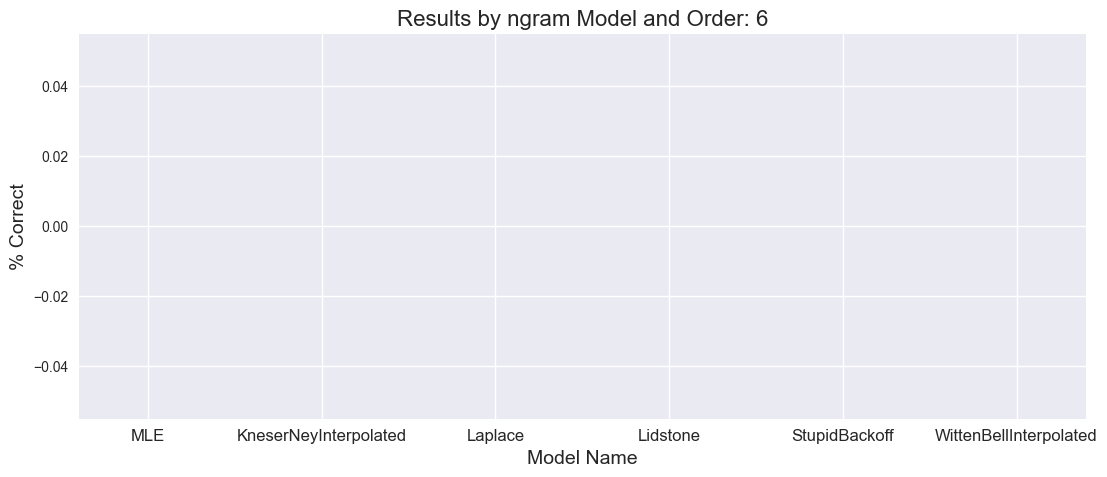

<Figure size 800x550 with 0 Axes>

In [56]:
print(orders)
for order in orders:

    ax = df_agg_results_test_1_trans[order].plot(kind='bar', color='blue', width=0.3, figsize=[13, 5])
    plt.xlabel("Model Name", fontsize=14)
    plt.ylabel("% Correct", fontsize=14)

    title = "Results by ngram Model and Order: " + str(order)
    plt.title(title,fontsize=16 )
    
    plt.xticks(rotation=0,fontsize=12)
    for p in ax.patches:
        ax.annotate(
            str(p.get_height()), xy=(p.get_x() + 0.25, p.get_height() + 0.1), fontsize=15
        )

    plt.show()
    plt.savefig("images/Aggregate Results Test-1.png")

## Test 2

In [57]:
""" Test 2
Function for Data preparation for this test
Take n rows from test set, convert a known sign to unclear sign and produce a dataframe
Note down the answers
"""

def test2_prepare_data(unclear_position, a, seed):
    try:

        verbose_debug = True
        min_text_chars = 2
        max_text_chars = 40
        max_num_of_rows= 5
        unclear_position= CONST_ALL
        #unclear_position= CONST_INITIAL

        df_made_up_from_test, test2_correct_answers =prepare_data(a, max_text_chars,min_text_chars,max_num_of_rows,unclear_position, seed)

        if(verbose_debug):
            print(df_made_up_from_test.changed_text)
            print("test2_correct_answers: \n", test2_correct_answers)
    except Exception as e:
        print("Exception:", e.__class__, "test2_prepare_data")
        traceback.print_exc()
        
    return df_made_up_from_test, test2_correct_answers


In [58]:
""" Test2
Function to Run the test
""" 
def test2_run(df,test2_correct_answers, algo,seed):
    try:
        out_dict = defaultdict()
        verbose_debug = True
        a= df[df.changed_text!=''].changed_text
        a_rev= df[df.changed_reversed_text!=''].changed_reversed_text
        check_the_answers = True
        try_reverse = False
        wrong_answer_details_verbose = True
        fill_using_position =True
        use_initial_terminal_model= False
        order_start=3

        out_dict,metrics_list = run_test("Test-2","train", algo, a, a_rev, fill_using_position, order_start, check_the_answers, test2_correct_answers, try_reverse, wrong_answer_details_verbose, seed)
    
        
    except Exception as e:
        print("Exception:", e.__class__, "test2_run")
        traceback.print_exc()
    return out_dict,metrics_list

In [59]:
""" Prepare and Run Test 2"""

verbose_debug= True
use_initial_terminal_model= False

results_2_dict = defaultdict()
results_2_metrics_dict = defaultdict()
test2_correct_answers = None
correct=0
total=0
a = df_test_x[df_test_x.l_to_r_text!=''].l_to_r_text
df_out= None
test2_correct_answers= None
out_dict=None
metrics_list= None

run_num_of_times_test= 1
orders = [6]
#algo= CONST_ALGO_SIGN_FILL_IN_START
#algo=CONST_ALGO_SIGN_FILL_IN_FULL
algo=CONST_ALGO_MIXED
unclear_position= CONST_ALL


for x in range(1,run_num_of_times_test+1):
    out_dict = defaultdict()
    df_out= None
    #random.seed(datetime.now())
    this_seed = x
    random.seed(x)
    df_out, test2_correct_answers = test2_prepare_data(unclear_position, a, this_seed )
    out_dict,metrics_list = test2_run(df_out, test2_correct_answers, algo, this_seed)
    
    """ add the output dictionary to dictionary of dictionaries containing results"""
    results_2_dict[x]= out_dict
    results_2_metrics_dict[x] =  metrics_list

0                        <s> 000 390 </s>
1                    <s> 235 240 000 </s>
2    <s> 861 002 003 220 590 405 000 </s>
3    <s> 140 287 002 415 220 879 000 </s>
4                    <s> 000 703 400 </s>
Name: changed_text, dtype: object
test2_correct_answers: 
 [{'text': '<s> 003 390 </s>', 'len_text': 16, 'answer': '003', 'type': 'Initial'}, {'text': '<s> 235 240 520 </s>', 'len_text': 20, 'answer': '520', 'type': 'Terminal'}, {'text': '<s> 861 002 003 220 590 405 740 </s>', 'len_text': 36, 'answer': '740', 'type': 'Terminal'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 36, 'answer': '740', 'type': 'Terminal'}, {'text': '<s> 617 703 400 </s>', 'len_text': 20, 'answer': '617', 'type': 'Initial'}]
_____________________________
_____ Running  Test-2 _________
_____________________________

_____Trying unclear texts in Fwd Direction:______

****************Model Name: MLE Type: <class 'nltk.lm.models.MLE'> Order: 6
L to R: Initial char is unclear <s> 000 390 </s> 

Traceback (most recent call last):
  File "/var/folders/2k/6c4ntjkd6990yr2wf4q4g_q80000gn/T/ipykernel_62108/2909413128.py", line 74, in run_test
    net_dict = Counter(net_dict) + Counter(out_dict)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/collections/__init__.py", line 721, in __add__
    if elem not in self and count > 0:
TypeError: '>' not supported between instances of 'str' and 'int'


In [60]:
df_metric = None
df_merged = None

for runs in range(1,run_num_of_times_test+1):
    for index in range(0, len(model_name_list)):
        df_metric = results_2_metrics_dict[runs][index].transpose()
        
        # Use row 0 as column name and remove row 0
        df_metric.columns = df_metric.iloc[0]
        df_metric = df_metric.drop(df_metric.index[0])
        df_metric['run'] = runs
        if(df_merged is None or len(df_merged)==0):
            df_merged = df_metric
        else: 
            df_merged = pd.concat([df_merged, df_metric])

agg_func_math = {
    'mrr':
    ['mean'],
    
    'total_hit_at_1_%': 
    ['mean'],
    
    'total_hit_category_at_1_%': 
    ['mean'],
    
    'total_hit_at_5_%': 
    ['mean'],
    
    'total_hit_at_10_%': 
    ['mean'],
    
    'beg_hit_at_1_%':
    ['mean'],
    
    'ter_hit_at_1_%':
    ['mean'],
    
    'med_hit_at_1_%':
    ['mean']
    ,
}

df_res = df_merged.groupby(['model_name']).agg(agg_func_math)

df_res

,mrr,total_hit_at_1_%,total_hit_category_at_1_%,total_hit_at_5_%,total_hit_at_10_%,beg_hit_at_1_%,ter_hit_at_1_%,med_hit_at_1_%
,mean,mean,mean,mean,mean,mean,mean,mean
model_name,,,,,,,,
KneserNeyInterpolated,0.44,40.0,40.0,60.0,60.0,0.0,67.0,-1.0
Laplace,0.70,60.0,60.0,80.0,80.0,0.0,100.0,-1.0
Lidstone,0.70,60.0,60.0,80.0,80.0,0.0,100.0,-1.0
MLE,0.54,40.0,40.0,80.0,80.0,0.0,67.0,-1.0
StupidBackoff,0.54,40.0,40.0,80.0,80.0,0.0,67.0,-1.0
WittenBellInterpolated,0.57,40.0,40.0,80.0,80.0,0.0,67.0,-1.0


In [61]:
print()
print("Aggregated Results for Test-2:")

"""Go through the results_2_dict which is dictionary of dictionary and process it"""
prefix = None
#agg_result_test_2_dict= defaultdict(dict[int, int])
agg_result_test_2_dict= defaultdict(dict)

for index in range(0, len(model_name_list)):
    for order in range (1, 8):
        agg_result_test_2_dict[model_name_list[index]][order]=0
        prefix = model_name_list[index]+ "_" + str(order)
        for runs in range(1,run_num_of_times_test+1):
            out_dict = results_2_dict[runs]
            if prefix in out_dict:
                #print("Run:", runs, prefix, "num_correct:", int(out_dict[prefix + "_" + "num_correct"]))
                #print("Run:", runs, prefix, "total_questions:", int(out_dict[prefix + "_" + "total_questions"]))
                correct = correct + int(out_dict[prefix + "_" + "num_correct"])
                total = total+ int(out_dict[prefix + "_" + "total_questions"])
                
        if(total>0):
            agg_result_test_2_dict[model_name_list[index]][order]=round((correct/total)*100,2)
            correct=0
            total=0

print()
print("Aggregated Correct %:")
print(agg_result_test_2_dict)

df_agg_results_test_2=pd.DataFrame(agg_result_test_2_dict)


Aggregated Results for Test-2:

Aggregated Correct %:
defaultdict(<class 'dict'>, {'MLE': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'KneserNeyInterpolated': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'Laplace': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'Lidstone': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'StupidBackoff': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'WittenBellInterpolated': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}})


In [62]:
df_agg_results_test_2_trans = df_agg_results_test_2.transpose()
df_agg_results_test_2_trans.rename(columns={0:'Model'}, inplace=True)
df_agg_results_test_2_trans

,1,2,3,4,5,6,7
MLE,0,0,0,0,0,0,0
KneserNeyInterpolated,0,0,0,0,0,0,0
Laplace,0,0,0,0,0,0,0
Lidstone,0,0,0,0,0,0,0
StupidBackoff,0,0,0,0,0,0,0
WittenBellInterpolated,0,0,0,0,0,0,0


## Test 3

In [63]:
"""  Test 3
Use the actual unclear text
We cannot handle multiple unclear character in a single text for now, so discard them
Data preparation for this test
""" 
verbose_debug = True
max_num_of_rows= 10

print("We have", len(df_unclear.index), " rows of unclear texts")

df_made_up = None
ls_made_up_row = []
test3_made_up_list = []
row_count=0

try:
    for text in df_unclear[df_unclear.l_to_r_text!=''].l_to_r_text :
        
        if text.find("[") != -1:
            """ Ignore the row as it is not clear where '[' appears if there is only one sign"""
            continue
        chars = text.split(' ')
        list_index = [i for i,val in enumerate(chars) if val=="000"]
        if(len(list_index)>1):
            print(text, "has more than one unclear char, skipping it ...")
        else:
            """Add this row after update padding for the text and reverse of the text"""
            made_up_row= {'site' : 'fake_site',
               'changed_reversed_text'  : pad(reverse_single_text(text)),
               'changed_text' : pad(text)}
            ls_made_up_row.append(made_up_row)
        
            row_count=row_count+1
            if(row_count>=max_num_of_rows): break

    df_made_up = pd.DataFrame(ls_made_up_row)
    test3_made_up_list  = df_made_up['changed_text'].tolist()
   
    
except Exception as e:
        print("Exception:", e.__class__, "Test 3 : Data preparation")
        traceback.print_exc()
    

if(verbose_debug):
    if(len(df_made_up)>0): 
        print(df_made_up.changed_text)
        print("We have", len(df_made_up.index), " rows of cleaned unclear texts after removing texts with more than one unclear character")


We have 291  rows of unclear texts
000 000 233 388 000 has more than one unclear char, skipping it ...
220 803 032 000 000 844 390 031 032 has more than one unclear char, skipping it ...
000 000 000 407 000 900 740 has more than one unclear char, skipping it ...
550 257 002 000 000 has more than one unclear char, skipping it ...
519 740 000 000 has more than one unclear char, skipping it ...
000 060 000 151 has more than one unclear char, skipping it ...
0            <s> 000 861 002 503 440 740 </s>
1                        <s> 000 790 750 </s>
2        <s> 861 002 032 220 240 100 000 </s>
3        <s> 000 530 296 002 840 032 740 </s>
4                    <s> 000 706 063 220 </s>
5    <s> 066 900 031 235 240 835 000 740 </s>
6            <s> 817 002 031 350 400 000 </s>
7            <s> 817 002 220 000 923 740 </s>
8                        <s> 000 032 400 </s>
9                    <s> 032 000 031 700 </s>
Name: changed_text, dtype: object
We have 10  rows of cleaned unclear texts after

In [64]:
""" Run Test 3"""
verbose_debug = False
a = df_made_up[df_made_up.changed_text!=''].changed_text
a_rev= df_made_up[df_made_up.changed_reversed_text!=''].changed_reversed_text
try_reverse = False
check_the_answers = False
wrong_answer_details_verbose = False
fill_using_position = False
use_initial_terminal_model= False
order_start=4
#algo= CONST_ALGO_SIGN_FILL_IN_START
#algo=CONST_ALGO_SIGN_FILL_IN_FULL
algo=CONST_ALGO_MIXED

ans = run_test("Test-3","all", algo, a, a_rev, fill_using_position, order_start, check_the_answers, None, try_reverse, wrong_answer_details_verbose, seed)

_____________________________
_____ Running  Test-3 _________
_____________________________

_____Trying unclear texts in Fwd Direction:______

****************Model Name: MLE Type: <class 'nltk.lm.models.MLE'> Order: 6
Fwd hexagram Model All: : MLE
[{'text': '<s> 000 861 002 503 440 740 </s>', 'pred_answer': '533', 'pred_answer_group': 'triangle'}, {'text': '<s> 000 790 750 </s>', 'pred_answer': '032', 'pred_answer_group': None}, {'text': '<s> 861 002 032 220 240 100 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 530 296 002 840 032 740 </s>', 'pred_answer': '323', 'pred_answer_group': 'house'}, {'text': '<s> 000 706 063 220 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 066 900 031 235 240 835 000 740 </s>', 'pred_answer': '407', 'pred_answer_group': 'stick'}, {'text': '<s> 817 002 031 350 400 000 </s>', 'pred_answer': '520', 'pred_answer_group': 'stick'}, {'text': '<s> 817 002 220 000 923 740 </s>', 'pred_answer': '235',

orig_text_sign,most_prob_sign_img,prob_sign_img
000 861 002 503 440 740,533,533 603 031 036 125
000 790 750,032,032 740 002 005 031
861 002 032 220 240 100 000,740,740 151 240 921 090
000 530 296 002 840 032 740,323,323 741
000 706 063 220,235,235 240 140 002 031
066 900 031 235 240 835 000 740,407,407 585 838 604 554
817 002 031 350 400 000,520,520 565 740 031 255
817 002 220 000 923 740,235,235 240 741 220 406
000 032 400,002,002 840 700 060 741
032 000 031 700,033,033 090 700 220 840



****************Model Name: KneserNeyInterpolated Type: <class 'nltk.lm.models.KneserNeyInterpolated'> Order: 6
Fwd hexagram Model All: : KneserNeyInterpolated
[{'text': '<s> 000 861 002 503 440 740 </s>', 'pred_answer': '603', 'pred_answer_group': 'square'}, {'text': '<s> 000 790 750 </s>', 'pred_answer': '032', 'pred_answer_group': None}, {'text': '<s> 861 002 032 220 240 100 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 530 296 002 840 032 740 </s>', 'pred_answer': '741', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 706 063 220 </s>', 'pred_answer': '140', 'pred_answer_group': 'human'}, {'text': '<s> 066 900 031 235 240 835 000 740 </s>', 'pred_answer': '773', 'pred_answer_group': 'U-shape'}, {'text': '<s> 817 002 031 350 400 000 </s>', 'pred_answer': '565', 'pred_answer_group': 'triangle'}, {'text': '<s> 817 002 220 000 923 740 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 000 032 400 </s>', 'pred_answer': '002

orig_text_sign,most_prob_sign_img,prob_sign_img
000 861 002 503 440 740,603,603 533 255 216 031
000 790 750,032,032 740 002 031 220
861 002 032 220 240 100 000,740,740 151 090 921 240
000 530 296 002 840 032 740,741,741 323
000 706 063 220,140,140 031 794 002 240
066 900 031 235 240 835 000 740,773,773 482 384 585 772
817 002 031 350 400 000,565,565 520 740 031 255
817 002 220 000 923 740,235,235 240 803 741 220
000 032 400,002,002 060 220 741 820
032 000 031 700,033,033 090 220 226 590



****************Model Name: Laplace Type: <class 'nltk.lm.models.Laplace'> Order: 6
Fwd hexagram Model All: : Laplace
[{'text': '<s> 000 861 002 503 440 740 </s>', 'pred_answer': '533', 'pred_answer_group': 'triangle'}, {'text': '<s> 000 790 750 </s>', 'pred_answer': '032', 'pred_answer_group': None}, {'text': '<s> 861 002 032 220 240 100 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 530 296 002 840 032 740 </s>', 'pred_answer': '323', 'pred_answer_group': 'house'}, {'text': '<s> 000 706 063 220 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 066 900 031 235 240 835 000 740 </s>', 'pred_answer': '760', 'pred_answer_group': 'U-shape'}, {'text': '<s> 817 002 031 350 400 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 817 002 220 000 923 740 </s>', 'pred_answer': '240', 'pred_answer_group': 'fish'}, {'text': '<s> 000 032 400 </s>', 'pred_answer': '002', 'pred_answer_group': None}, {'text': '<s>

orig_text_sign,most_prob_sign_img,prob_sign_img
000 861 002 503 440 740,533,533 603 031 036 125
000 790 750,032,032 740 002 005 031
861 002 032 220 240 100 000,740,740 151 240 921 090
000 530 296 002 840 032 740,323,323 741
000 706 063 220,235,235 240 140 002 031
066 900 031 235 240 835 000 740,760,760 100 176 390 032
817 002 031 350 400 000,740,740 520 565 031 255
817 002 220 000 923 740,240,240 235 220 803 741
000 032 400,002,002 840 700 060 741
032 000 031 700,033,033 700 220 840 226



****************Model Name: Lidstone Type: <class 'nltk.lm.models.Lidstone'> Order: 6
Fwd hexagram Model All: : Lidstone
[{'text': '<s> 000 861 002 503 440 740 </s>', 'pred_answer': '533', 'pred_answer_group': 'triangle'}, {'text': '<s> 000 790 750 </s>', 'pred_answer': '032', 'pred_answer_group': None}, {'text': '<s> 861 002 032 220 240 100 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 530 296 002 840 032 740 </s>', 'pred_answer': '323', 'pred_answer_group': 'house'}, {'text': '<s> 000 706 063 220 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 066 900 031 235 240 835 000 740 </s>', 'pred_answer': '760', 'pred_answer_group': 'U-shape'}, {'text': '<s> 817 002 031 350 400 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 817 002 220 000 923 740 </s>', 'pred_answer': '240', 'pred_answer_group': 'fish'}, {'text': '<s> 000 032 400 </s>', 'pred_answer': '002', 'pred_answer_group': None}, {'text': '

orig_text_sign,most_prob_sign_img,prob_sign_img
000 861 002 503 440 740,533,533 603 031 036 125
000 790 750,032,032 740 002 005 031
861 002 032 220 240 100 000,740,740 151 240 921 090
000 530 296 002 840 032 740,323,323 741
000 706 063 220,235,235 240 140 002 031
066 900 031 235 240 835 000 740,760,760 100 176 390 032
817 002 031 350 400 000,740,740 520 565 031 255
817 002 220 000 923 740,240,240 235 220 803 741
000 032 400,002,002 840 700 060 741
032 000 031 700,033,033 700 220 840 226



****************Model Name: StupidBackoff Type: <class 'nltk.lm.models.StupidBackoff'> Order: 6
Fwd hexagram Model All: : StupidBackoff
[{'text': '<s> 000 861 002 503 440 740 </s>', 'pred_answer': '533', 'pred_answer_group': 'triangle'}, {'text': '<s> 000 790 750 </s>', 'pred_answer': '032', 'pred_answer_group': None}, {'text': '<s> 861 002 032 220 240 100 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 530 296 002 840 032 740 </s>', 'pred_answer': '323', 'pred_answer_group': 'house'}, {'text': '<s> 000 706 063 220 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 066 900 031 235 240 835 000 740 </s>', 'pred_answer': '407', 'pred_answer_group': 'stick'}, {'text': '<s> 817 002 031 350 400 000 </s>', 'pred_answer': '520', 'pred_answer_group': 'stick'}, {'text': '<s> 817 002 220 000 923 740 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 000 032 400 </s>', 'pred_answer': '002', 'pred_answer_group': None},

orig_text_sign,most_prob_sign_img,prob_sign_img
000 861 002 503 440 740,533,533 603 031 036 125
000 790 750,032,032 740 002 005 031
861 002 032 220 240 100 000,740,740 151 240 921 090
000 530 296 002 840 032 740,323,323 741
000 706 063 220,235,235 240 140 002 031
066 900 031 235 240 835 000 740,407,407 585 838 604 554
817 002 031 350 400 000,520,520 565 740 031 255
817 002 220 000 923 740,235,235 240 741 220 406
000 032 400,002,002 840 700 060 741
032 000 031 700,033,033 090 700 220 840



****************Model Name: WittenBellInterpolated Type: <class 'nltk.lm.models.WittenBellInterpolated'> Order: 6
Fwd hexagram Model All: : WittenBellInterpolated
[{'text': '<s> 000 861 002 503 440 740 </s>', 'pred_answer': '603', 'pred_answer_group': 'square'}, {'text': '<s> 000 790 750 </s>', 'pred_answer': '032', 'pred_answer_group': None}, {'text': '<s> 861 002 032 220 240 100 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 530 296 002 840 032 740 </s>', 'pred_answer': '741', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 706 063 220 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 066 900 031 235 240 835 000 740 </s>', 'pred_answer': '585', 'pred_answer_group': 'hill'}, {'text': '<s> 817 002 031 350 400 000 </s>', 'pred_answer': '565', 'pred_answer_group': 'triangle'}, {'text': '<s> 817 002 220 000 923 740 </s>', 'pred_answer': '240', 'pred_answer_group': 'fish'}, {'text': '<s> 000 032 400 </s>', 'pred_answer': '002'

orig_text_sign,most_prob_sign_img,prob_sign_img
000 861 002 503 440 740,603,603 533 255 216 031
000 790 750,032,032 740 002 220 233
861 002 032 220 240 100 000,740,740 151 090 921 240
000 530 296 002 840 032 740,741,741 323
000 706 063 220,235,235 240 140 002 233
066 900 031 235 240 835 000 740,585,585 482 384 773 772
817 002 031 350 400 000,565,565 520 740 031 840
817 002 220 000 923 740,240,240 235 220 803 741
000 032 400,002,002 840 700 820 060
032 000 031 700,033,033 090 220 700 840
